# Project Name: Global Terrorism Dataset Analysis

## Project Description
#### The Global Terrorism Database (GTD) is an open-source   database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland. Explore and analyze the data to discover key findings pertaining to terrorist activities.

## Main Libraries to be used:
- Pandas for data manipulation, aggregation
- Matplotlib and Seaborn for visualisation and behaviour with respect to the target variable. Use at least 5 different visualisations.
- NumPy for computationally efficient operations


# Explore and analyze the data to discover key findings pertaining to terrorist activities.

## Objectives
##### The objective of the project would be to derive meanignful insights from the given data set. Following are the pointers we would be focusing on:
1. Data cleaning and finalising features
2. Analysing global terror events
3. Analysing most affected regions
4. Analysing most affected countries

##### THE INFORMATION REGARDING COLOUMN SUCH AS COLOUMN DEFINITION AND EXPLANATION HAS BEEN TAKEN FROM [Global Terrorism Database (GTD) CODEBOOK: METHODOLOGY, INCLUSION CRITERIA, AND VARIABLES](https://www.start.umd.edu/gtd/downloads/Codebook.pdf)

##### DATASET - [GTD Dataset](https://bit.ly/2TK5Xn5)

### Author: [Jeet Majumdar](https://www.linkedin.com/in/jeet-majumdar648/)

# 1. Data cleaning and finalising features

The GTD contains 135 columns and 181691 rows of data related to terror events from 1970 to 2017. So in this step, we will,

1. Eliminate unwanted columns
2. Comprehend the NaN values
3. Rename the column names for better understanding

##### Importing all the Libraries required for analysis

In [1]:
#The following libraries are used
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Importing and observing the Data
The data is of latin1 encoding instead of UTF-8 encoding.

In [2]:
data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin1')
df=pd.DataFrame(data)
print("Data imported successfully")
data.head()

C:\Users\Jeet Majumdar\AppData\Local\Temp\ipykernel_744\2763421227.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin1')


Data imported successfully


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [4]:
df.shape

(181691, 135)

In [5]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
list(df.columns.values)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

##### Cleaning The Data

In [7]:
df = df[['iyear','imonth','iday','country_txt','region_txt','provstate','city','latitude','longitude','location','summary','attacktype1_txt','targtype1_txt','gname','motive','weaptype1_txt','nkill','nwound','addnotes']]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [8]:
df.rename(columns={ 'iyear':'Year',
                    'imonth':'Month',
                    'iday':'Day',
                    'country_txt':'Country',
                    'region_txt':'Region',
                    'provstate':'State',
                    'city':'City',
                    'latitude':'Latitude',
                    'longitude':'Longitude',
                    'location':'Location',
                    'summary':'Summary',
                    'attacktype1_txt':'AttackType',
                    'targtype1_txt':'TargetType',
                    'gname':'Group',
                    'motive':'Motive',
                    'weaptype1_txt':'Weapon',
                    'nkill':'Kill',
                    'nwound':'Wound',
                    'addnotes':'AddNotes'},inplace=True)
df.head()

,Year,Month,Day,Country,Region,State,City,Latitude,Longitude,Location,Summary,AttackType,TargetType,Group,Motive,Weapon,Kill,Wound,AddNotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   Day         181691 non-null  int64  
 3   Country     181691 non-null  object 
 4   Region      181691 non-null  object 
 5   State       181270 non-null  object 
 6   City        181257 non-null  object 
 7   Latitude    177135 non-null  float64
 8   Longitude   177134 non-null  float64
 9   Location    55495 non-null   object 
 10  Summary     115562 non-null  object 
 11  AttackType  181691 non-null  object 
 12  TargetType  181691 non-null  object 
 13  Group       181691 non-null  object 
 14  Motive      50561 non-null   object 
 15  Weapon      181691 non-null  object 
 16  Kill        171378 non-null  float64
 17  Wound       165380 non-null  float64
 18  AddNotes    28289 non-null   object 
dtypes:

In [10]:
df.shape

(181691, 19)

In [11]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
State            421
City             434
Latitude        4556
Longitude       4557
Location      126196
Summary        66129
AttackType         0
TargetType         0
Group              0
Motive        131130
Weapon             0
Kill           10313
Wound          16311
AddNotes      153402
dtype: int64

In [12]:
df['Kill'] = df['Kill'].fillna(0)
df['Wound'] = df['Wound'].fillna(0)
df['Casualties'] = df['Kill'] + df['Wound']

In [13]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Kill,Wound,Casualties
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


## Observation:
1. The data consists of terorist activities ranging from the year 1970 to 2017
2. Maximum number of people killed in an event were: 1570
3. Maximum number of people wounded in an event were: 8191
4. Maximum number of people casualties in an event were: 9574

## Visualising the Data

### 1. Year wise Attacks:

   1. Number of Attacks in each year ->

In [14]:
attacks = df["Year"].value_counts(dropna = False).sort_index().to_frame().reset_index().rename(columns = {"index" : "Year", "Year" : "Attacks"}).set_index("Year")
attacks.head()

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


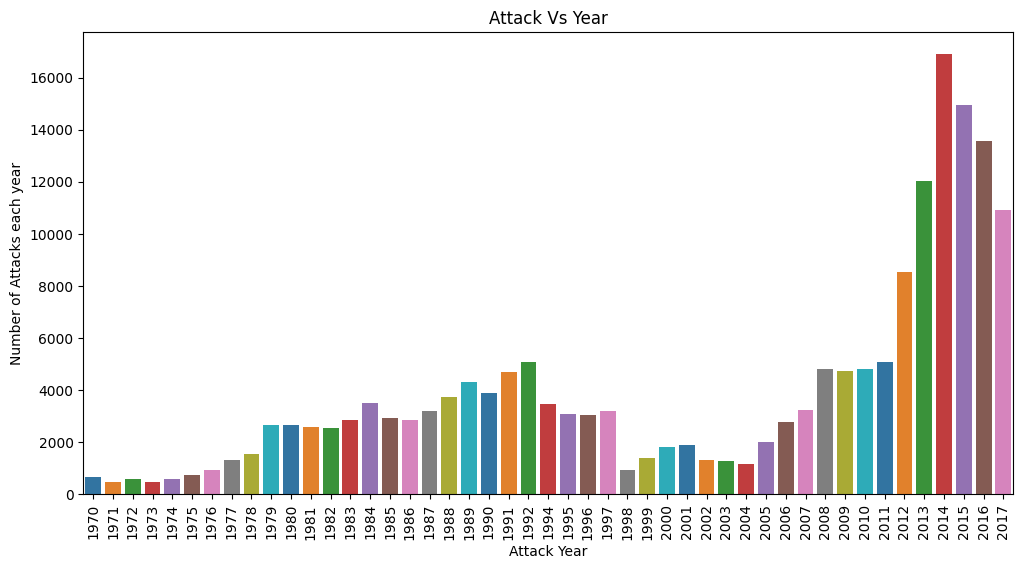

In [15]:
# Plotting the graph of attacks vs year
plt.figure(figsize = (12,6))
sns.barplot(x = attacks.index, y = attacks.Attacks, palette = "tab10")   # Ploting the graph using seaborn
plt.xticks(rotation = 90)
plt.xlabel("Attack Year")
plt.ylabel("Number of Attacks each year")
plt.title("Attack Vs Year")
plt.show()

### Conclusion:
1. The number of attacks have increased exponentially from 1970 to 2017
2. The number of attacks were maximum in the year 2014
3. The number of attacks were minimum in the year 1971

2. Number of Casualties in each year ->

In [16]:
yc = df[["Year", "Casualties"]].groupby("Year").sum()
yc.head()

,Casualties
Year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


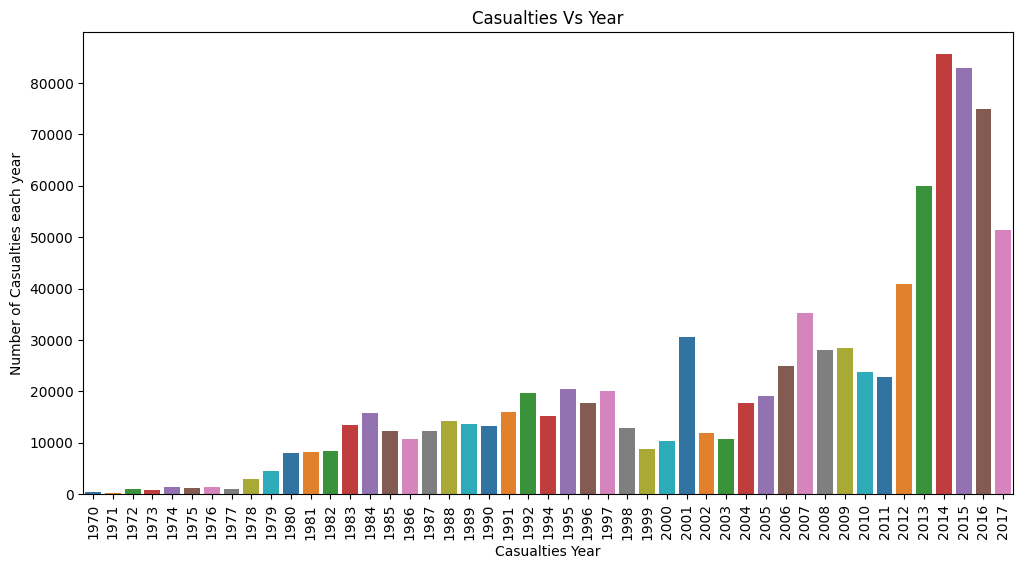

In [17]:
# Plotting the graph of Casualties vs year
plt.figure(figsize = (12,6))
sns.barplot(x = yc.index, y = yc.Casualties, palette = "tab10")
plt.xticks(rotation = 90)
plt.xlabel("Casualties Year")
plt.ylabel("Number of Casualties each year")
plt.title("Casualties Vs Year")
plt.show()

3. Number of people killed in each year ->

In [18]:
yk = df[["Year", "Kill"]].groupby("Year").sum()
yk.head()

,Kill
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


4. Number of people wounded in each year ->

In [19]:
yw = df[["Year", "Wound"]].groupby("Year").sum()
yw.head()

,Wound
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


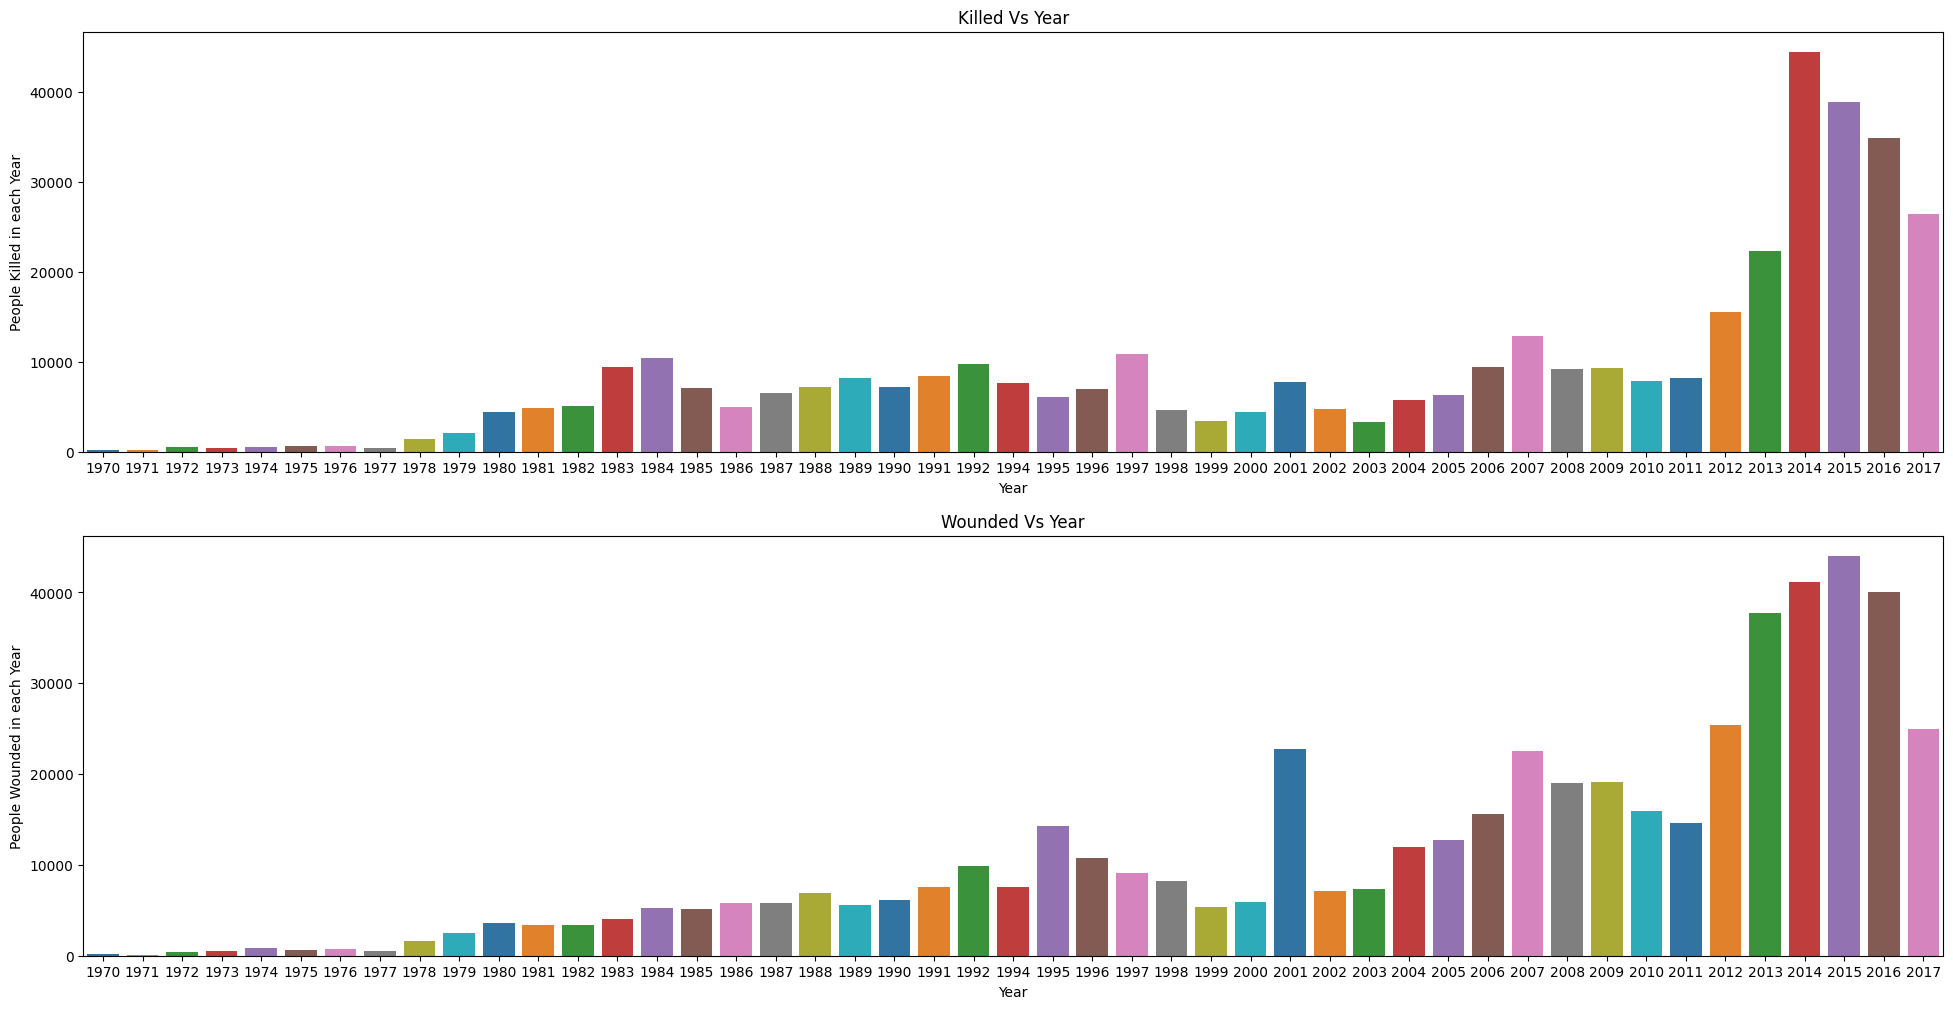

In [20]:
# Plotting the graph of Killed and Wounded vs year
fig = plt.figure(figsize = (24,12))
ax0 = fig.add_subplot(2,1,1)
ax1 = fig.add_subplot(2,1,2)

# Killed
sns.barplot(x = yk.index, y = yk.Kill, palette = "tab10", ax = ax0)
ax0.set_ylabel("People Killed in each Year")
ax0.set_xlabel("Year")
ax0.set_title("Killed Vs Year")

# Wounded
sns.barplot(x = yw.index, y = yw.Wound, palette = "tab10", ax = ax1)
ax1.set_ylabel("People Wounded in each Year")
ax1.set_xlabel("Year")
ax1.set_title("Wounded Vs Year")

plt.show()

### Conclusion:
1. Maximum number of people were killed in the year 2014
2. Maximum number of people were wounded in the year 2015
3. Minimum number of people were killed in the year 1971
4. Minimum number of people were wounded in the year 1971

### 2. Region wise Attacks:

   1. Distribution of Terrorist Attacks across Regions from 1970-2017

In [21]:
region = pd.crosstab(df.Year, df.Region)
region.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


In [22]:
region.shape

(47, 12)

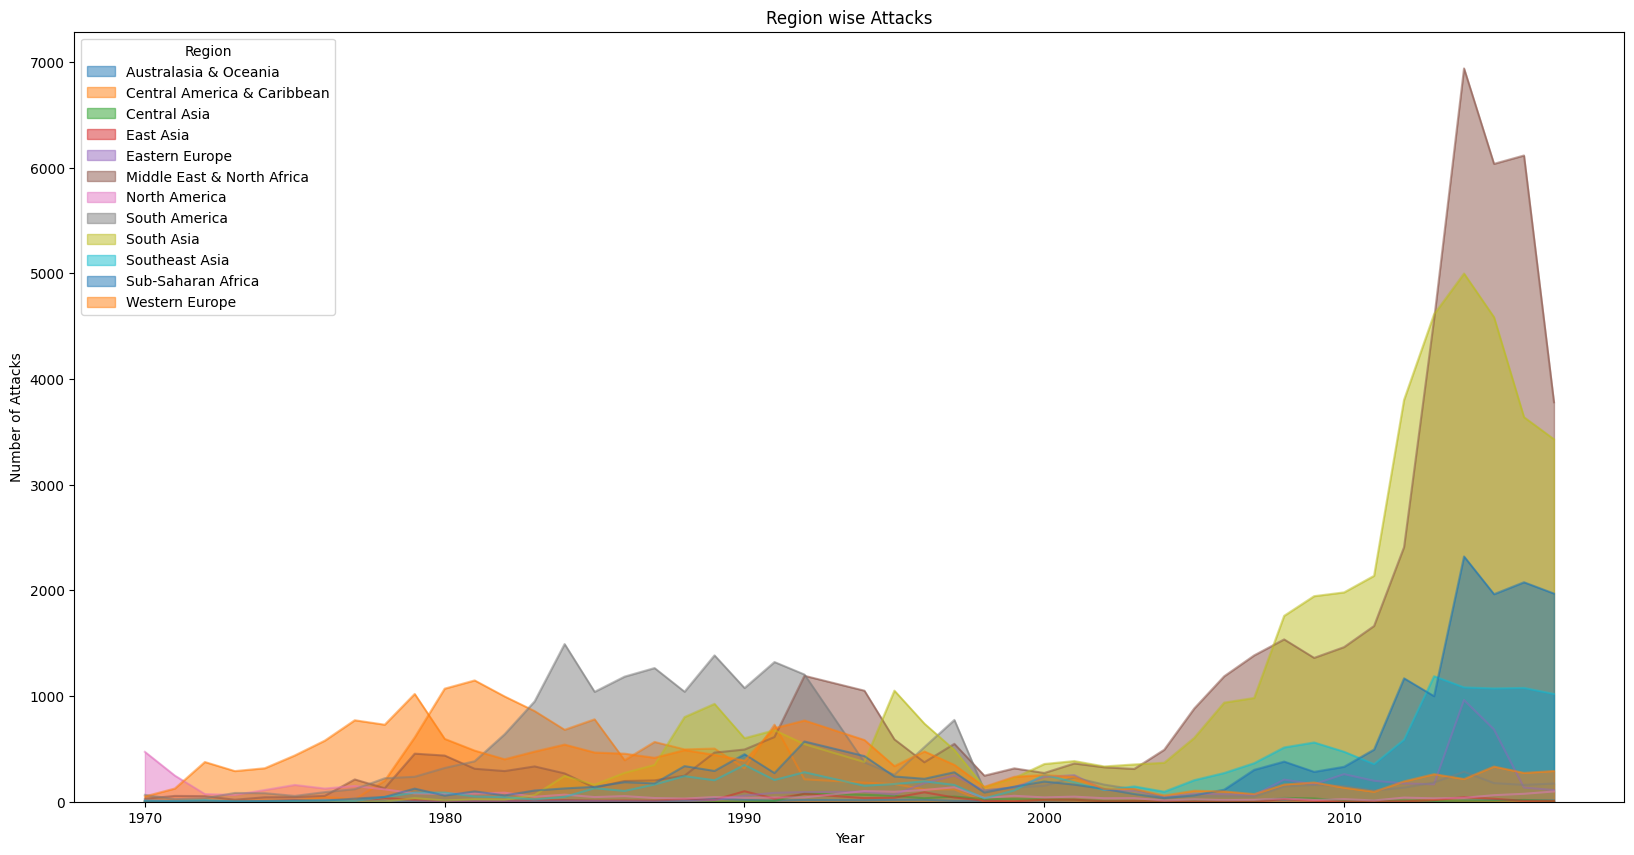

In [23]:
# Plotting the graph of Attacks in each region vs year
region.plot(kind = "area", stacked = False, alpha = 0.5, figsize = (20,10))
plt.title("Region wise Attacks")
plt.ylabel("Number of Attacks")
plt.xlabel("Year")
plt.show()

2. Total Terrorist Attacks in each region from 1970-2017

In [24]:
regt = region.transpose()
regt["Total"] = regt.sum(axis=1)
ra = regt['Total'].sort_values(ascending=False)
ra

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Total, dtype: int64

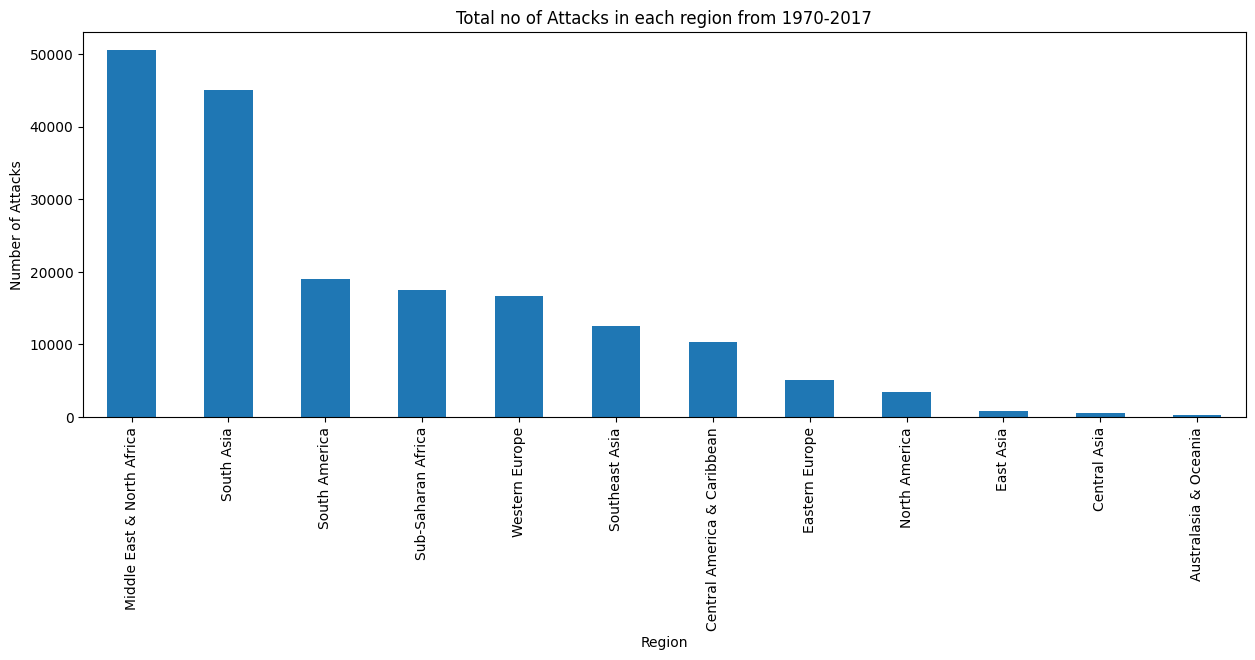

In [25]:
# Plotting the graph of total no of Attacks in each region from 1970-2017
ra.plot(kind='bar', figsize=(15,5))
plt.title("Total no of Attacks in each region from 1970-2017")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")
plt.show()

3. Total Casualties(Killed+Wonded) in each Region

In [26]:
rc=df[["Region","Casualties"]].groupby("Region").sum().sort_values(by="Casualties",ascending=False)
rc

,Casualties
Region,
Middle East & North Africa,351950.0
South Asia,242679.0
Sub-Saharan Africa,131243.0
South America,45553.0
Southeast Asia,41896.0
Central America & Caribbean,37699.0
North America,26447.0
Western Europe,25026.0
Eastern Europe,19460.0


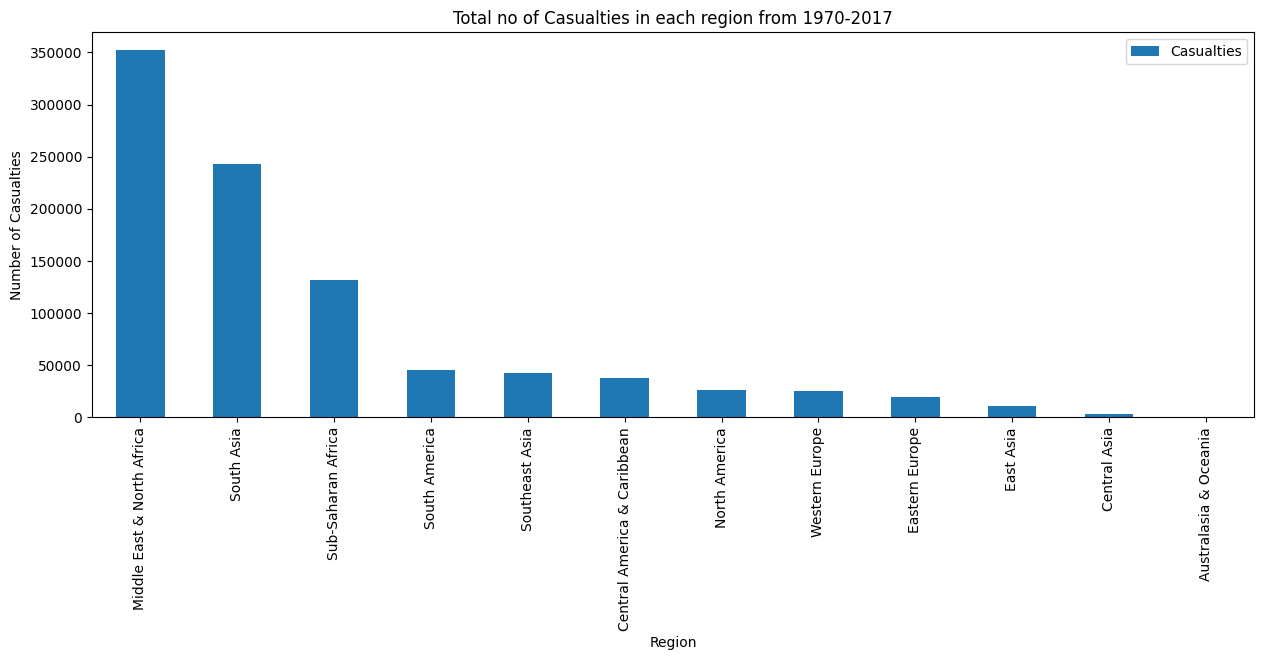

In [27]:
# Plotting the graph of total no of Casualties in each region from 1970-2017
rc.plot(kind='bar', figsize=(15,5))
plt.title("Total no of Casualties in each region from 1970-2017")
plt.xlabel("Region")
plt.ylabel("Number of Casualties")
plt.show()


4. Killed in each Region

In [28]:
rk = df[["Region", "Kill"]].groupby("Region").sum().sort_values(by = "Kill", ascending = False)
rk

,Kill
Region,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


5. Wounded in each region from 1970-2017

In [29]:
rw = df[["Region", "Wound"]].groupby("Region").sum().sort_values(by = "Wound", ascending = False)
rw

,Wound
Region,
Middle East & North Africa,214308.0
South Asia,141360.0
Sub-Saharan Africa,52857.0
Southeast Asia,26259.0
North America,21531.0
Western Europe,18332.0
South America,16704.0
Eastern Europe,12045.0
East Asia,9213.0


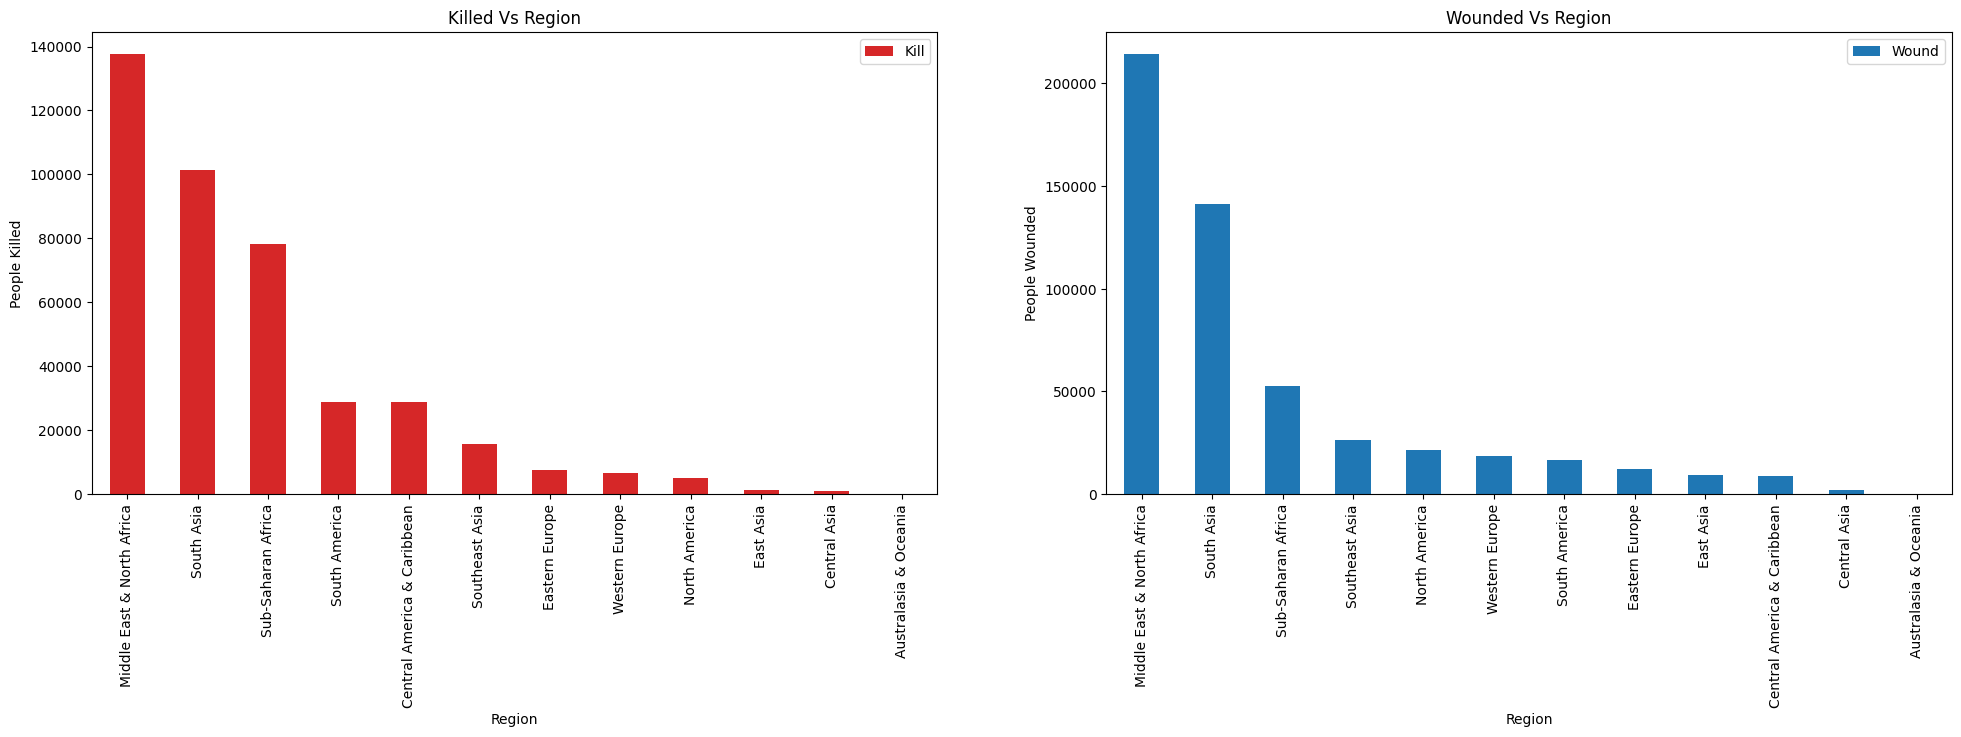

In [30]:
# Plotting the graph of total no of killed and wounded in each region from 1970-2017
fig = plt.figure(figsize = (24,6))
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

# Killed
rk.plot(kind = "bar", color = "tab:red", ax = ax0)
ax0.set_ylabel("People Killed")
ax0.set_xlabel("Region")
ax0.set_title("Killed Vs Region")

# Wounded
rw.plot(kind = "bar", color = "tab:blue", ax = ax1)
ax1.set_ylabel("People Wounded")
ax1.set_xlabel("Region")
ax1.set_title("Wounded Vs Region")

plt.show()

### 3. Country wise Attacks - Top 10
1. Number of Attacks in each Country

In [31]:
ct = df["Country"].value_counts().head(10)
ct

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

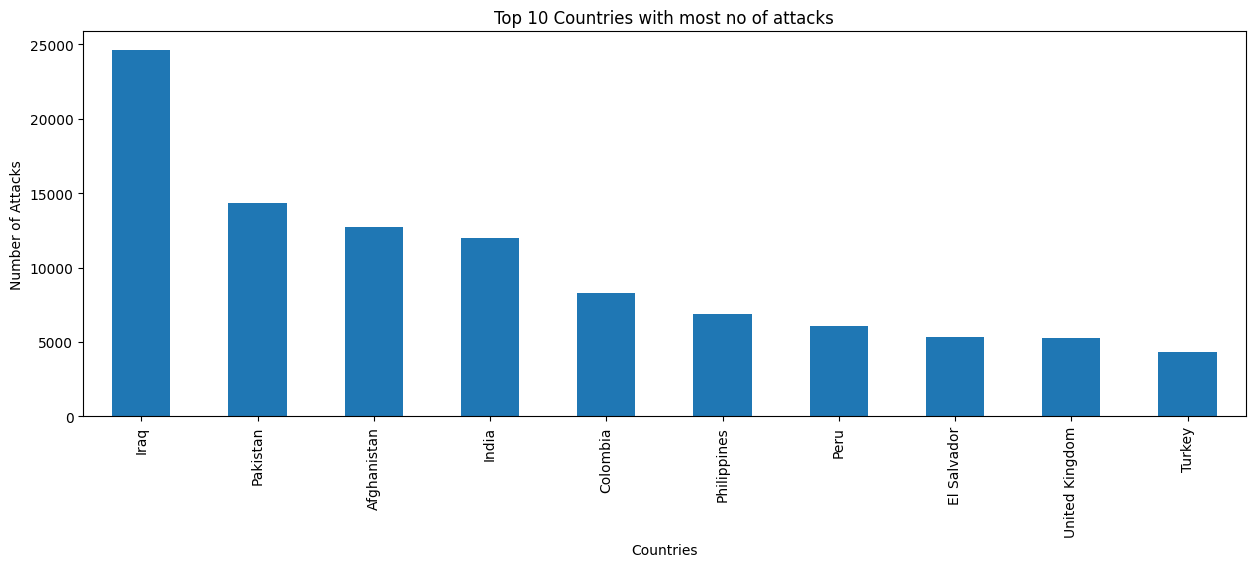

In [32]:
# Plotting the graph of top 10 countries with most no of attacks
ct.plot(kind='bar', figsize=(15,5))
plt.title("Top 10 Countries with most no of attacks")
plt.xlabel("Countries")
plt.ylabel("Number of Attacks")
plt.show()

2. Total Casualties(killed+Wounded)in each Country

In [33]:
cnc = df[["Country", "Casualties"]].groupby("Country").sum().sort_values(by = "Casualties", ascending = False).head(10)
cnc

,Casualties
Country,
Iraq,213279.0
Afghanistan,83661.0
Pakistan,65860.0
India,48321.0
Nigeria,32921.0
Sri Lanka,31091.0
Syria,29338.0
Colombia,25026.0
United States,24473.0


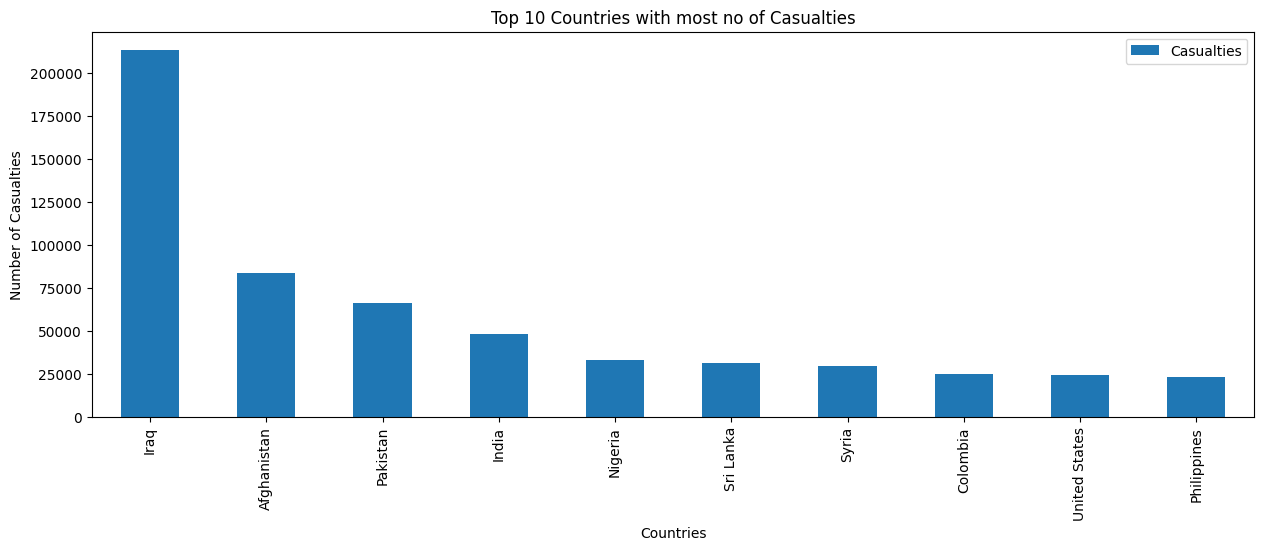

In [34]:
cnc.plot(kind = "bar", figsize = (15,5))
plt.title("Top 10 Countries with most no of Casualties")
plt.xlabel("Countries")
plt.ylabel("Number of Casualties")
plt.show()


3. Killed in each country

In [35]:
cnk = df[["Country", "Kill"]].groupby("Country").sum().sort_values(by = "Kill", ascending = False).head(10)
cnk

,Kill
Country,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0
Sri Lanka,15530.0
Syria,15229.0
Colombia,14698.0
Peru,12771.0


4. Wounded in each country

In [36]:
cnw = df[["Country", "Wound"]].groupby("Country").sum().sort_values(by = "Wound", ascending = False).head(10)   
cnw

,Wound
Country,
Iraq,134690.0
Afghanistan,44277.0
Pakistan,42038.0
India,28980.0
United States,20702.0
Sri Lanka,15561.0
Syria,14109.0
Philippines,13367.0
Lebanon,10904.0


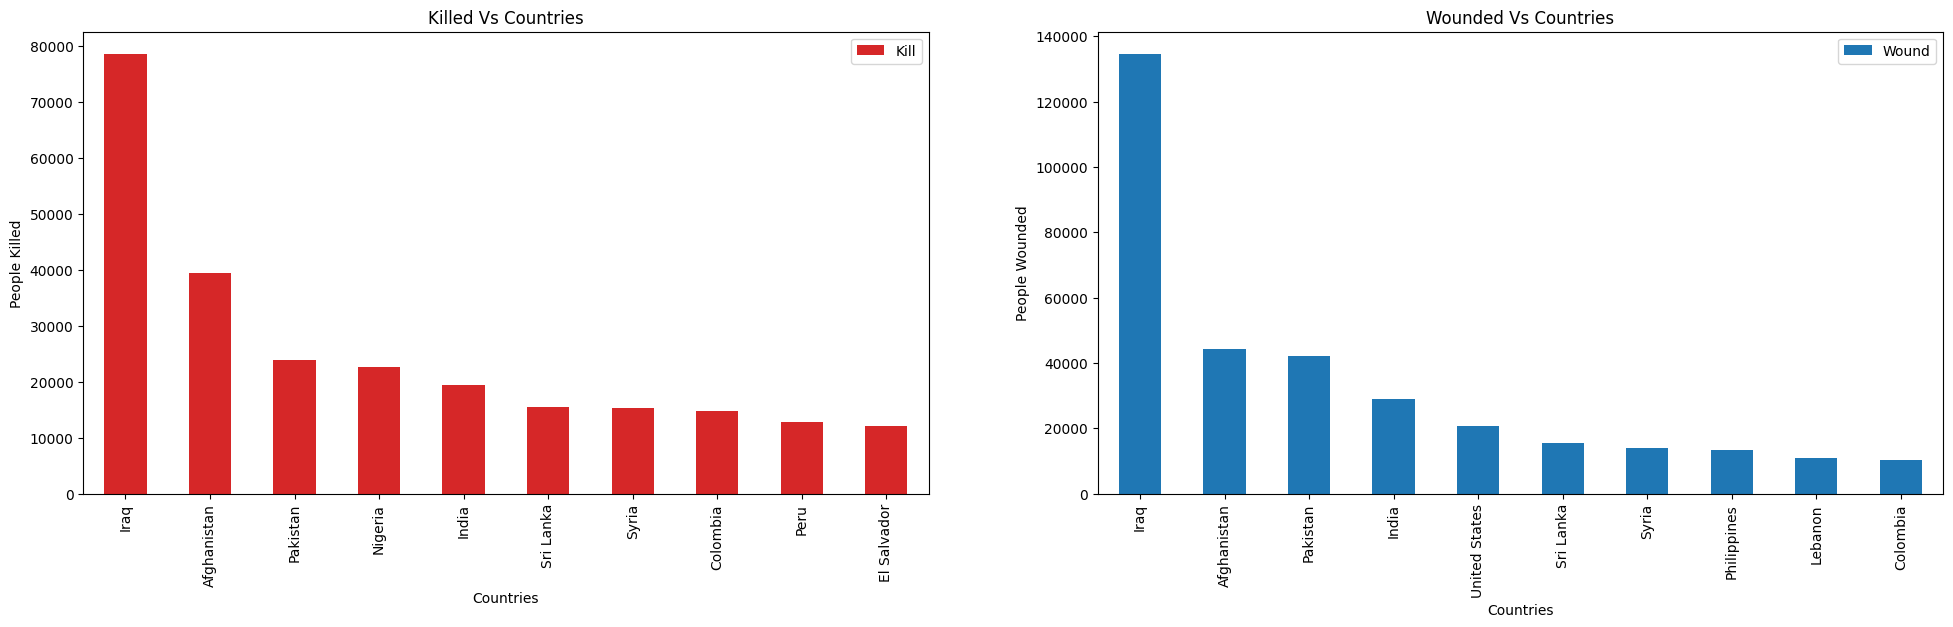

In [37]:
# plotting the graph of top 10 countries with most no of killed and wounded people from 1970-2017
fig = plt.figure(figsize = (24,6))
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

# Killed
cnk.plot(kind = "bar", color = "tab:red", ax = ax0)
ax0.set_ylabel("People Killed")
ax0.set_xlabel("Countries")
ax0.set_title("Killed Vs Countries")

# Wounded
cnw.plot(kind = "bar", color = "tab:blue", ax = ax1)
ax1.set_ylabel("People Wounded")
ax1.set_xlabel("Countries")
ax1.set_title("Wounded Vs Countries")

plt.show()

### 4. City wise Attacks Top 10
1. Number of Attacks in each city

In [38]:
city = df["City"].value_counts().drop("Unknown").head(10)
city

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: City, dtype: int64

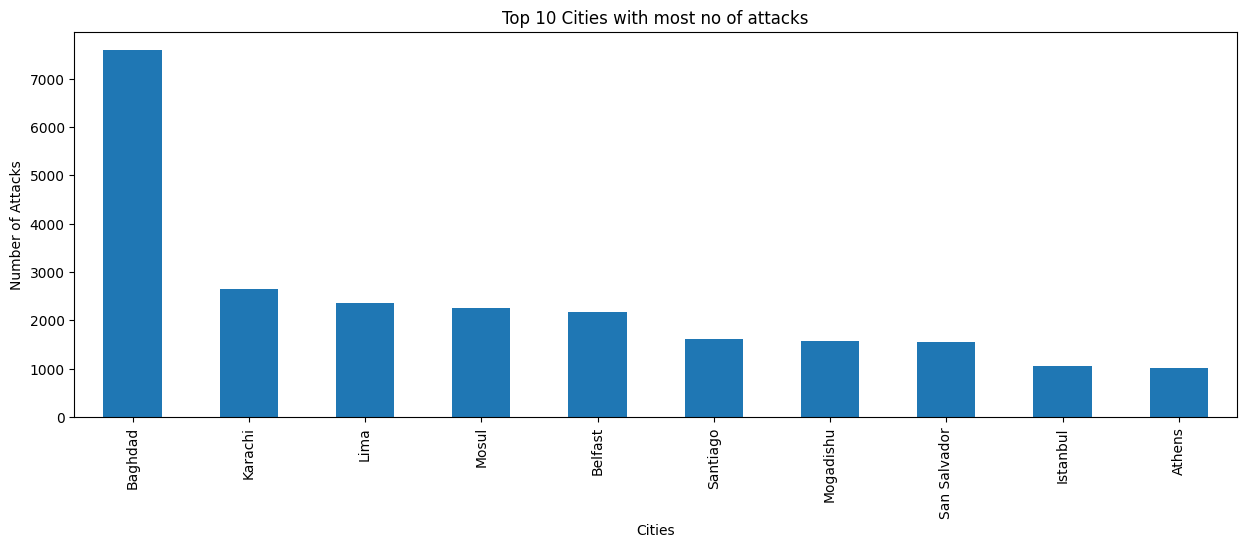

In [39]:
city.plot(kind='bar', figsize=(15,5))
plt.title("Top 10 Cities with most no of attacks")
plt.xlabel("Cities")
plt.ylabel("Number of Attacks")
plt.show()

2. Total Casualties in each city

In [40]:
cityc = df[["City", "Casualties"]].groupby("City").sum().sort_values(by = "Casualties", ascending = False).drop("Unknown").head(10)
cityc

,Casualties
City,
Baghdad,77876.0
New York City,19619.0
Mosul,12927.0
Karachi,9376.0
Mogadishu,8868.0
Kabul,8466.0
Beirut,7257.0
Kirkuk,6636.0
Colombo,5906.0


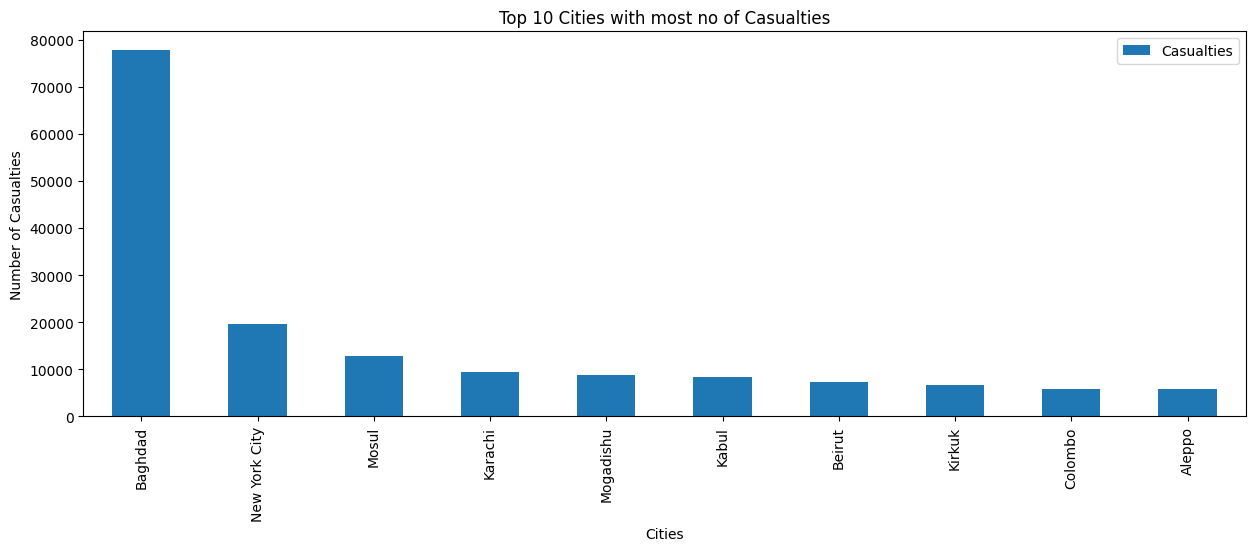

In [41]:
cityc.plot(kind = "bar", figsize = (15,5))
plt.title("Top 10 Cities with most no of Casualties")
plt.xlabel("Cities")
plt.ylabel("Number of Casualties")
plt.show()

3. Killed in each city

In [42]:
cityk = df[["City", "Kill"]].groupby("City").sum().sort_values(by = "Kill", ascending = False).drop("Unknown").head(10)
cityk

,Kill
City,
Baghdad,21151.0
Mosul,7140.0
Mogadishu,3913.0
Karachi,3688.0
New York City,2838.0
Tikrit,2679.0
Kabul,2493.0
Ramadi,2313.0
Maiduguri,2235.0


4. Wounded in each city

In [43]:
cityw = df[["City", "Wound"]].groupby("City").sum().sort_values(by = "Wound", ascending = False).drop("Unknown").head(10)
cityw

,Wound
City,
Baghdad,56725.0
New York City,16781.0
Kabul,5973.0
Mosul,5787.0
Karachi,5688.0
Tokyo,5542.0
Beirut,5341.0
Nairobi,5024.0
Kirkuk,5008.0


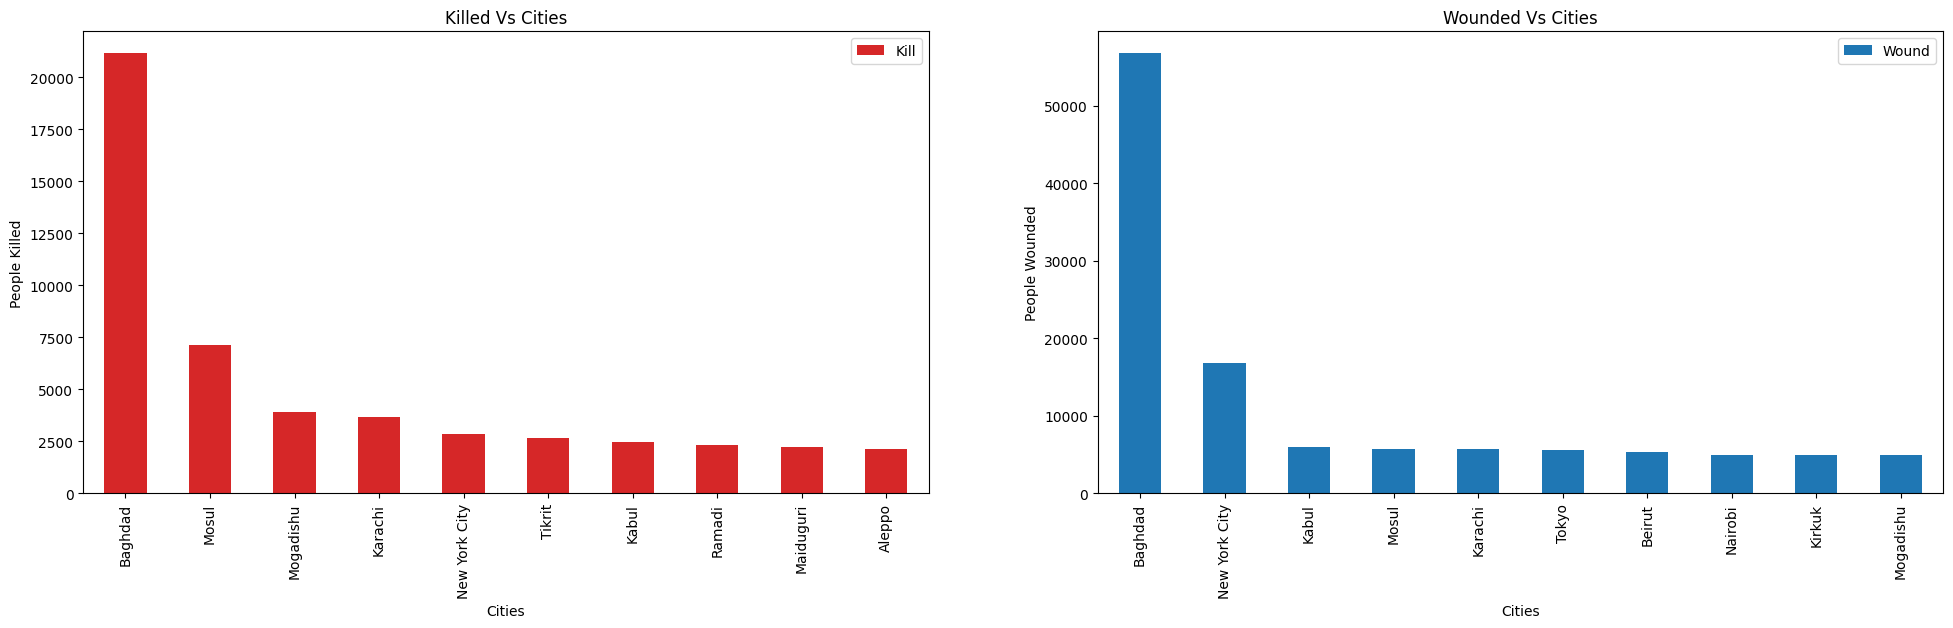

In [44]:
# plotting the graph of top 10 cities with most no of killed and wounded people from 1970-2017
fig = plt.figure(figsize = (24,6))
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

# Killed
cityk.plot(kind = "bar", color = "tab:red", ax = ax0)
ax0.set_ylabel("People Killed")
ax0.set_xlabel("Cities")
ax0.set_title("Killed Vs Cities")

# Wounded
cityw.plot(kind = "bar", color = "tab:blue", ax = ax1)
ax1.set_ylabel("People Wounded")
ax1.set_xlabel("Cities")
ax1.set_title("Wounded Vs Cities")

plt.show()

### 5. Terrorist Group Wise attacks Top 10

In [45]:
grp = df["Group"].value_counts()[1:10]
grp

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Group, dtype: int64

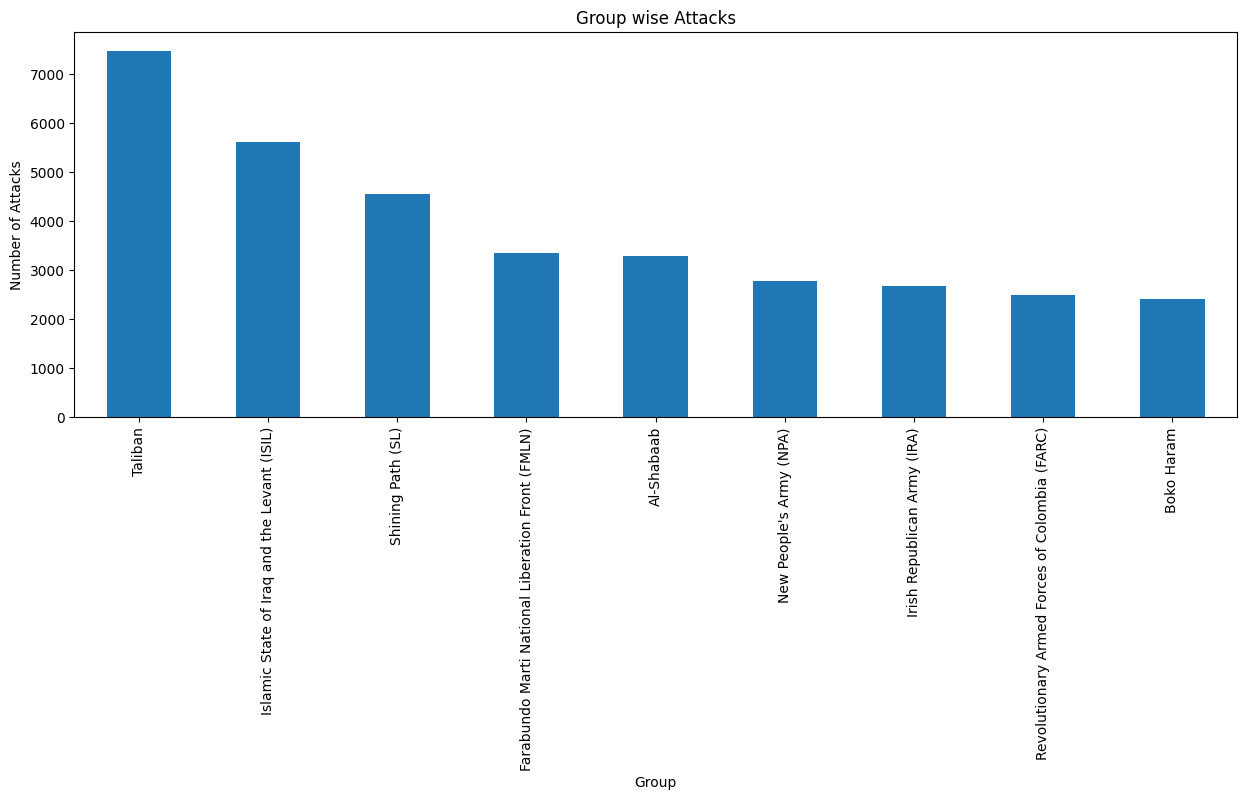

In [46]:
grp.plot(kind='bar', figsize=(15,5))
plt.title("Group wise Attacks")
plt.xlabel("Group")
plt.ylabel("Number of Attacks")
plt.show()

2. Total Casualties by each Group

In [47]:
gc = df[["Group", "Casualties"]].groupby("Group").sum().sort_values(by = "Casualties", ascending = False).drop("Unknown").head(10)
gc

,Casualties
Group,
Islamic State of Iraq and the Levant (ISIL),69595.0
Taliban,57342.0
Boko Haram,29801.0
Al-Qaida,28372.0
Liberation Tigers of Tamil Eelam (LTTE),22020.0
Al-Shabaab,16954.0
Tehrik-i-Taliban Pakistan (TTP),15574.0
Al-Qaida in Iraq,14724.0
Shining Path (SL),14632.0


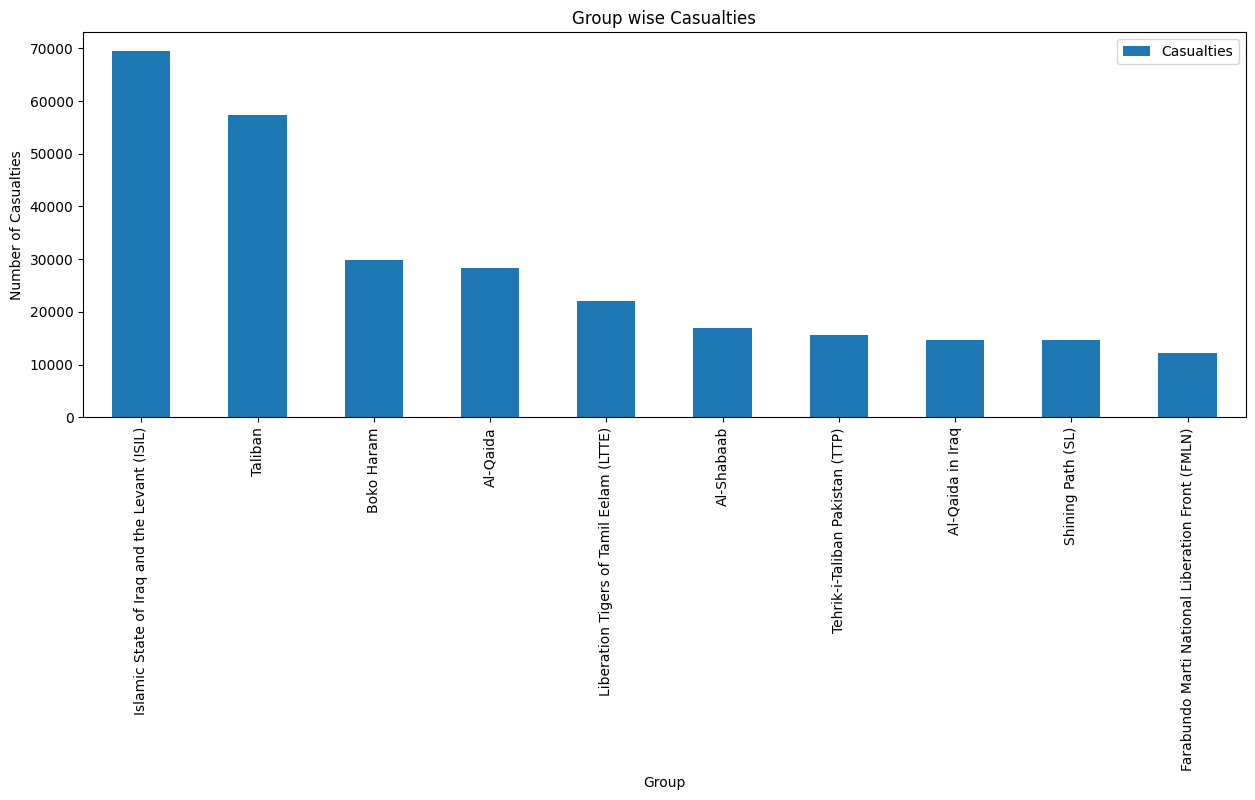

In [48]:
gc.plot(kind='bar', figsize=(15,5))
plt.title("Group wise Casualties")
plt.xlabel("Group")
plt.ylabel("Number of Casualties")
plt.show()

3. Killed by each gropu

In [49]:
gk = df[["Group", "Kill"]].groupby("Group").sum().sort_values(by = "Kill", ascending = False).drop("Unknown").head(10)
gk

,Kill
Group,
Islamic State of Iraq and the Levant (ISIL),38923.0
Taliban,29410.0
Boko Haram,20328.0
Shining Path (SL),11601.0
Liberation Tigers of Tamil Eelam (LTTE),10989.0
Al-Shabaab,9330.0
Farabundo Marti National Liberation Front (FMLN),8065.0
Nicaraguan Democratic Force (FDN),6662.0
Tehrik-i-Taliban Pakistan (TTP),6042.0


4. Wounded by each group

In [50]:
gw = df[["Group", "Wound"]].groupby("Group").sum().sort_values(by = "Wound", ascending = False).drop("Unknown").head(10)
gw

,Wound
Group,
Islamic State of Iraq and the Levant (ISIL),30672.0
Taliban,27932.0
Al-Qaida,24512.0
Liberation Tigers of Tamil Eelam (LTTE),11031.0
Al-Qaida in Iraq,10343.0
Tehrik-i-Taliban Pakistan (TTP),9532.0
Boko Haram,9473.0
Al-Shabaab,7624.0
Aum Shinri Kyo,6003.0


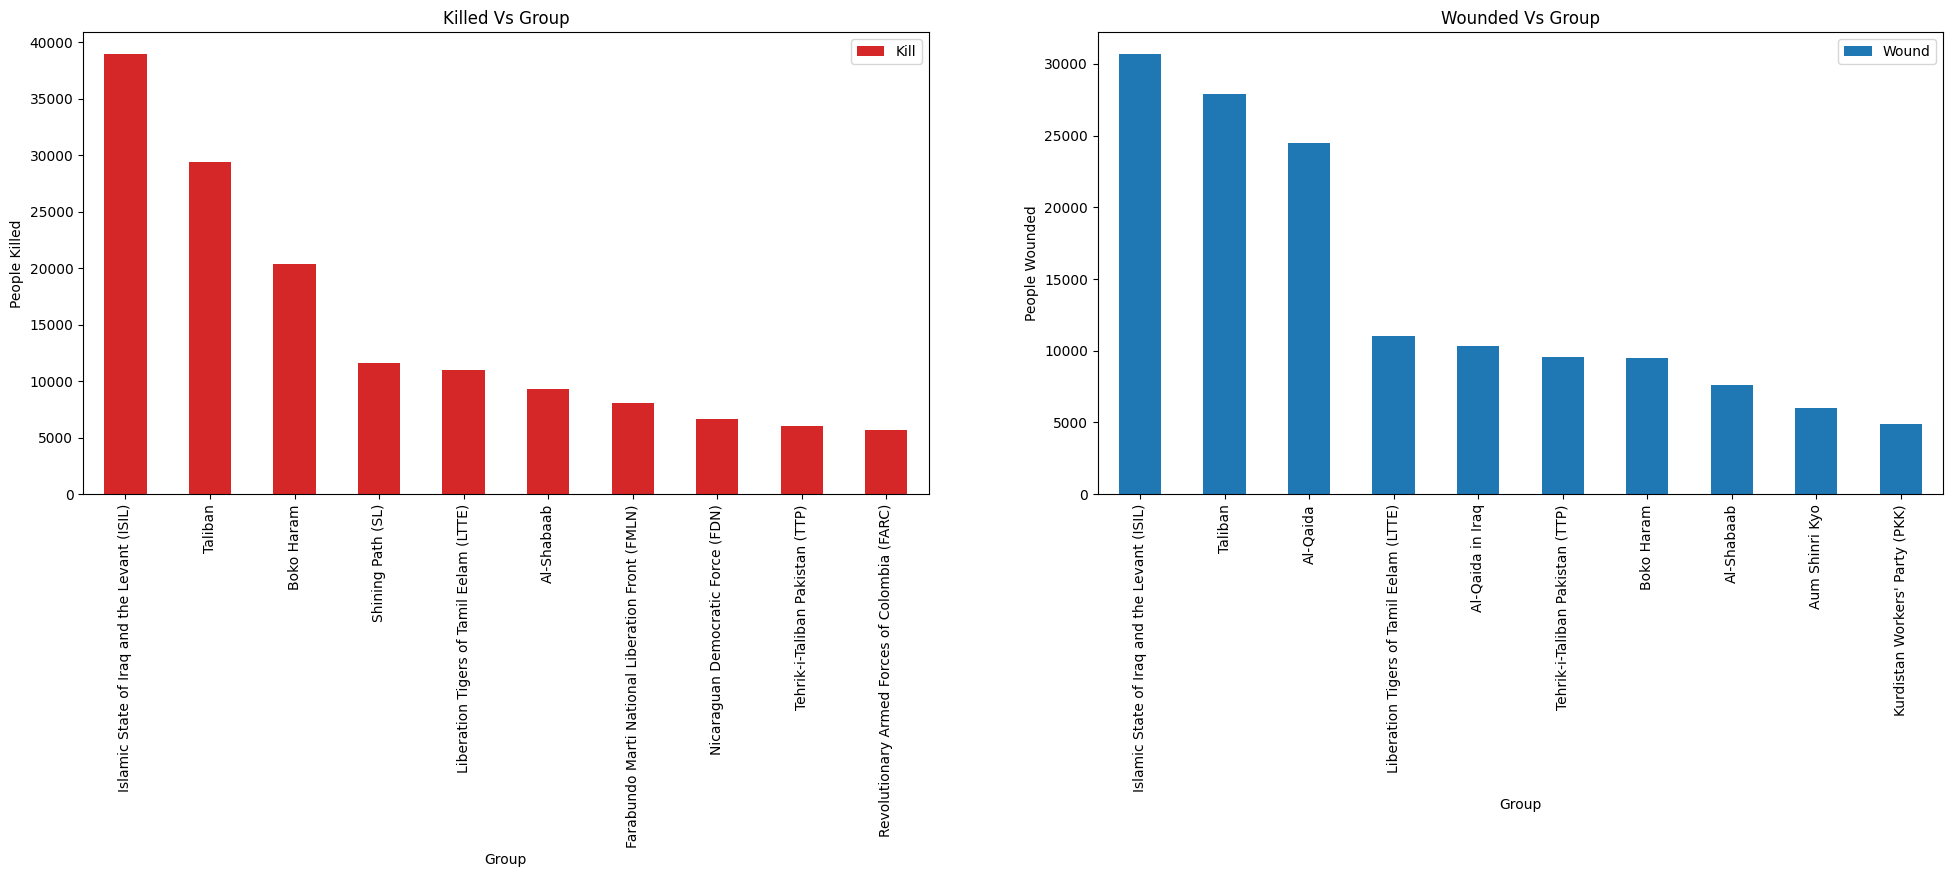

In [51]:
# plotting the graph of top 10 groups with most no of killed and wounded people from 1970-2017
fig = plt.figure(figsize = (24,6))
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

# Killed
gk.plot(kind = "bar", color = "tab:red", ax = ax0)
ax0.set_ylabel("People Killed")
ax0.set_xlabel("Group")
ax0.set_title("Killed Vs Group")

# Wounded
gw.plot(kind = "bar", color = "tab:blue", ax = ax1)
ax1.set_ylabel("People Wounded")
ax1.set_xlabel("Group")
ax1.set_title("Wounded Vs Group")

plt.show()

### 6. Attack Type wise Attacks
1. Number of Attacks by each Attack Type

In [52]:
at = df["AttackType"].value_counts()
at

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

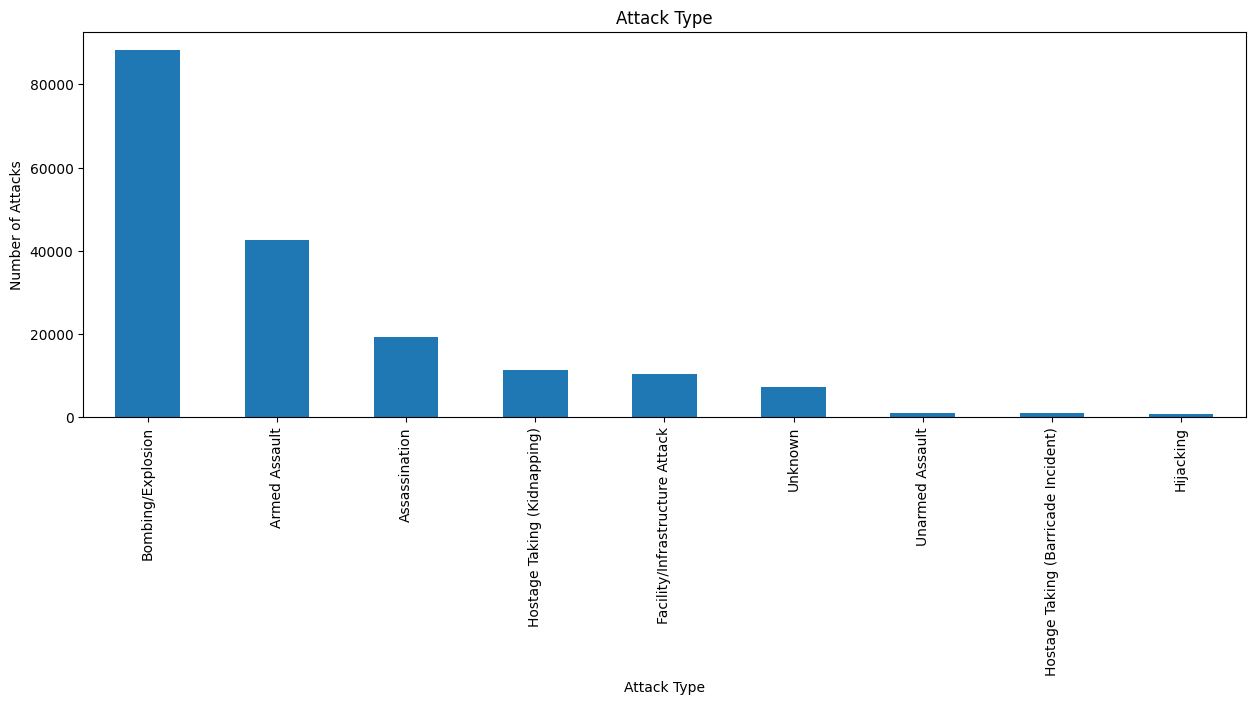

In [53]:
at.plot(kind='bar', figsize=(15,5))
plt.title("Attack Type")
plt.xlabel("Attack Type")
plt.ylabel("Number of Attacks")
plt.show()

2. Total Casualties by each attack type

In [54]:
ac = df[["AttackType", "Casualties"]].groupby("AttackType").sum().sort_values(by = "Casualties", ascending = False)
ac

,Casualties
AttackType,
Bombing/Explosion,530007.0
Armed Assault,237663.0
Unknown,47106.0
Assassination,38807.0
Hostage Taking (Kidnapping),30677.0
Hijacking,20719.0
Unarmed Assault,14907.0
Hostage Taking (Barricade Incident),8444.0
Facility/Infrastructure Attack,7407.0


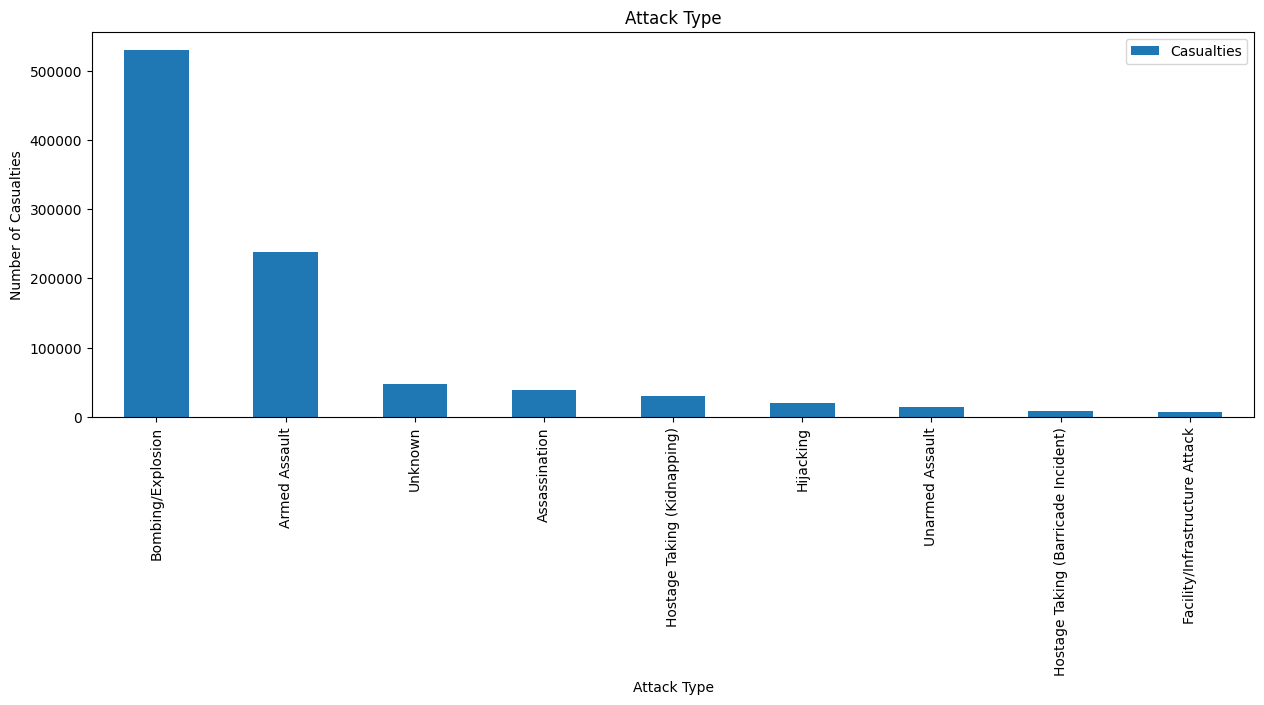

In [55]:
ac.plot(kind='bar', figsize=(15,5))
plt.title("Attack Type")
plt.xlabel("Attack Type")
plt.ylabel("Number of Casualties")
plt.show()

3. Killed by each attack type

In [56]:
ak = df[["AttackType", "Kill"]].groupby("AttackType").sum().sort_values(by = "Kill", ascending = False)
ak

,Kill
AttackType,
Armed Assault,160297.0
Bombing/Explosion,157321.0
Unknown,32381.0
Assassination,24920.0
Hostage Taking (Kidnapping),24231.0
Hostage Taking (Barricade Incident),4478.0
Hijacking,3718.0
Facility/Infrastructure Attack,3642.0
Unarmed Assault,880.0


4. Wounded by each attack type

In [57]:
aw = df[["AttackType", "Wound"]].groupby("AttackType").sum().sort_values(by = "Wound", ascending = False)
aw

,Wound
AttackType,
Bombing/Explosion,372686.0
Armed Assault,77366.0
Hijacking,17001.0
Unknown,14725.0
Unarmed Assault,14027.0
Assassination,13887.0
Hostage Taking (Kidnapping),6446.0
Hostage Taking (Barricade Incident),3966.0
Facility/Infrastructure Attack,3765.0


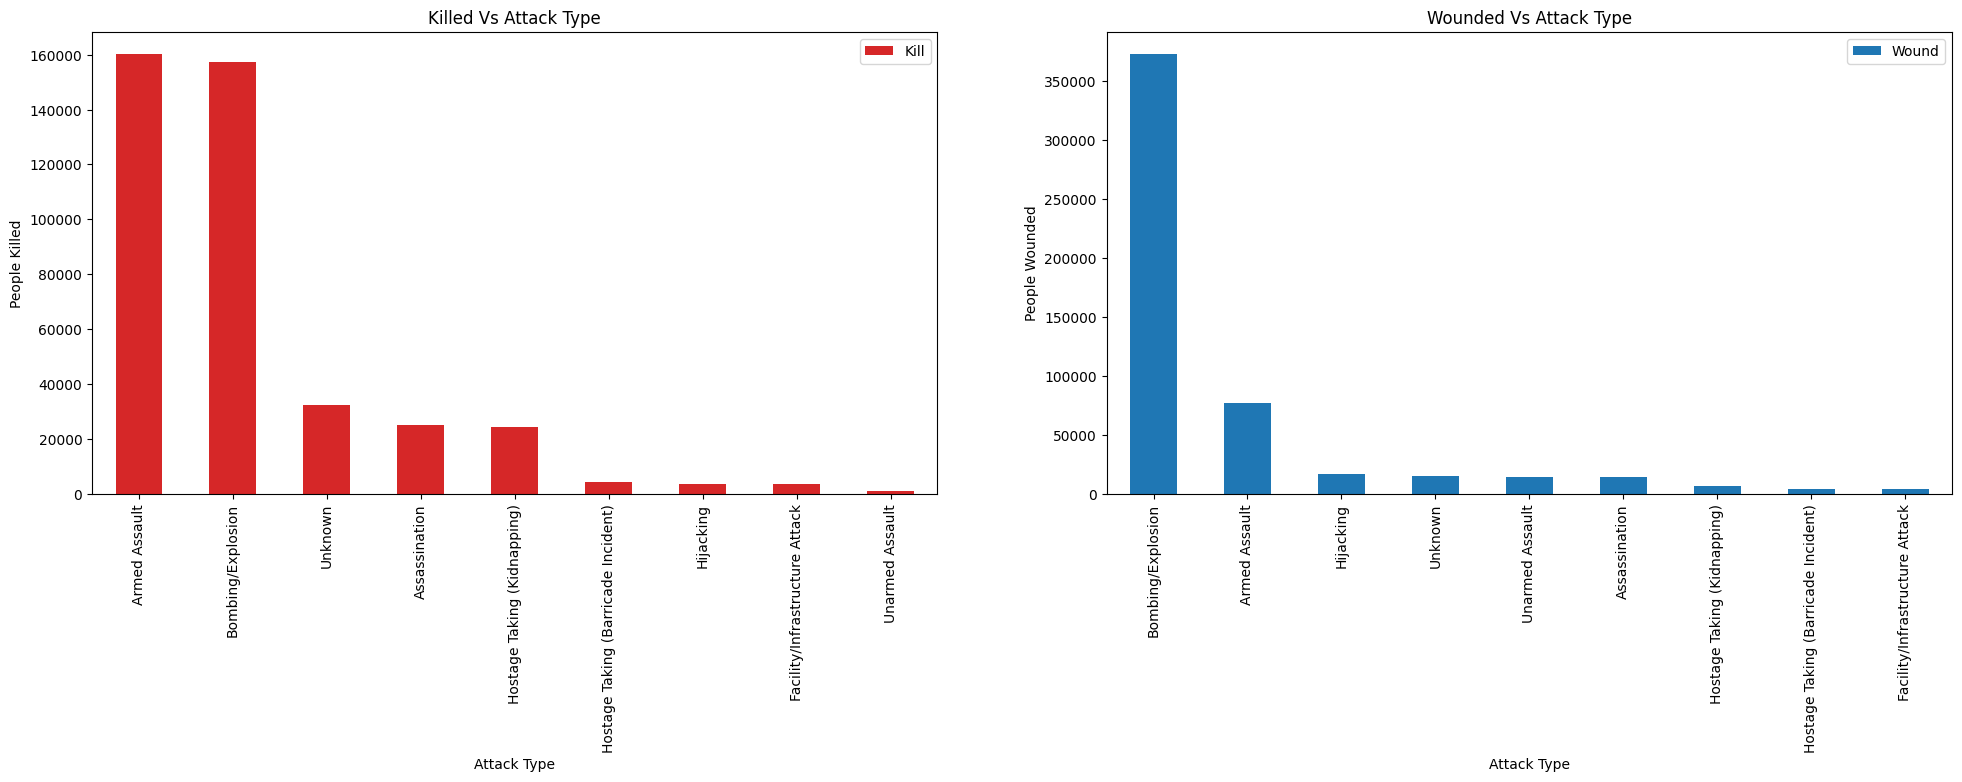

In [58]:
# plotting the graph of Attack Type with most no of killed and wounded people from 1970-2017
fig = plt.figure(figsize = (24,6))
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

# Killed
ak.plot(kind = "bar", color = "tab:red", ax = ax0)
ax0.set_ylabel("People Killed")
ax0.set_xlabel("Attack Type")
ax0.set_title("Killed Vs Attack Type")

# Wounded
aw.plot(kind = "bar", color = "tab:blue", ax = ax1)
ax1.set_ylabel("People Wounded")
ax1.set_xlabel("Attack Type")
ax1.set_title("Wounded Vs Attack Type")

plt.show()

### 7. Target Type wise Attacks
1. Number of Attacks over each Target Type

In [59]:
ta = df["TargetType"].value_counts()
ta

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: TargetType, dtype: int64

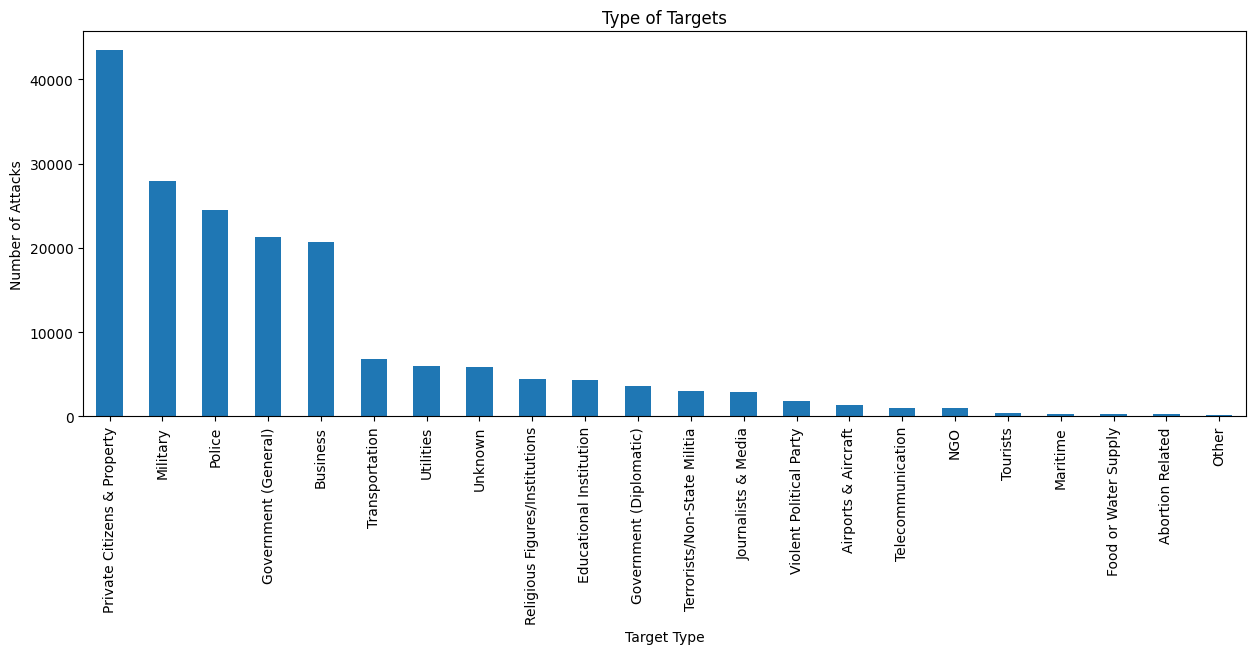

In [60]:
ta.plot(kind='bar', figsize=(15,5))
plt.title("Type of Targets")
plt.xlabel("Target Type")
plt.ylabel("Number of Attacks")
plt.show()

2. Total Casualties by target type

In [61]:
tc = df[["TargetType", "Casualties"]].groupby("TargetType").sum().sort_values(by = "Casualties", ascending = False)
tc

,Casualties
TargetType,
Private Citizens & Property,319176.0
Military,177085.0
Police,118407.0
Business,78018.0
Government (General),67255.0
Transportation,54595.0
Religious Figures/Institutions,37890.0
Terrorists/Non-State Militia,17311.0
Educational Institution,13972.0


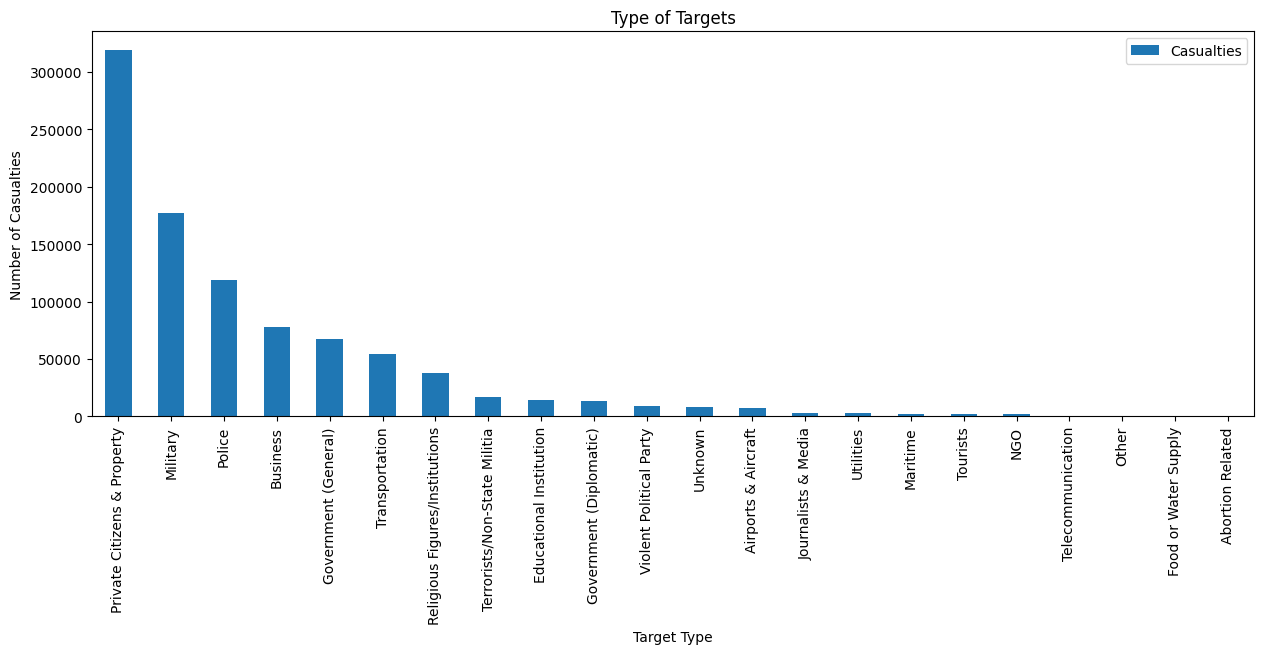

In [62]:
tc.plot(kind='bar', figsize=(15,5))
plt.title("Type of Targets")
plt.xlabel("Target Type")
plt.ylabel("Number of Casualties")
plt.show()

3. Killed by each target type

In [63]:
tk = df[["TargetType", "Kill"]].groupby("TargetType").sum().sort_values(by = "Kill", ascending = False)
tk

,Kill
TargetType,
Private Citizens & Property,140504.0
Military,106047.0
Police,53704.0
Government (General),26071.0
Business,23487.0
Transportation,13916.0
Religious Figures/Institutions,13413.0
Terrorists/Non-State Militia,9088.0
Unknown,4329.0


4. Wounded by each target type

In [64]:
tw = df[["TargetType", "Wound"]].groupby("TargetType").sum().sort_values(by = "Wound", ascending = False)
tw

,Wound
TargetType,
Private Citizens & Property,178672.0
Military,71038.0
Police,64703.0
Business,54531.0
Government (General),41184.0
Transportation,40679.0
Religious Figures/Institutions,24477.0
Government (Diplomatic),10359.0
Educational Institution,10227.0


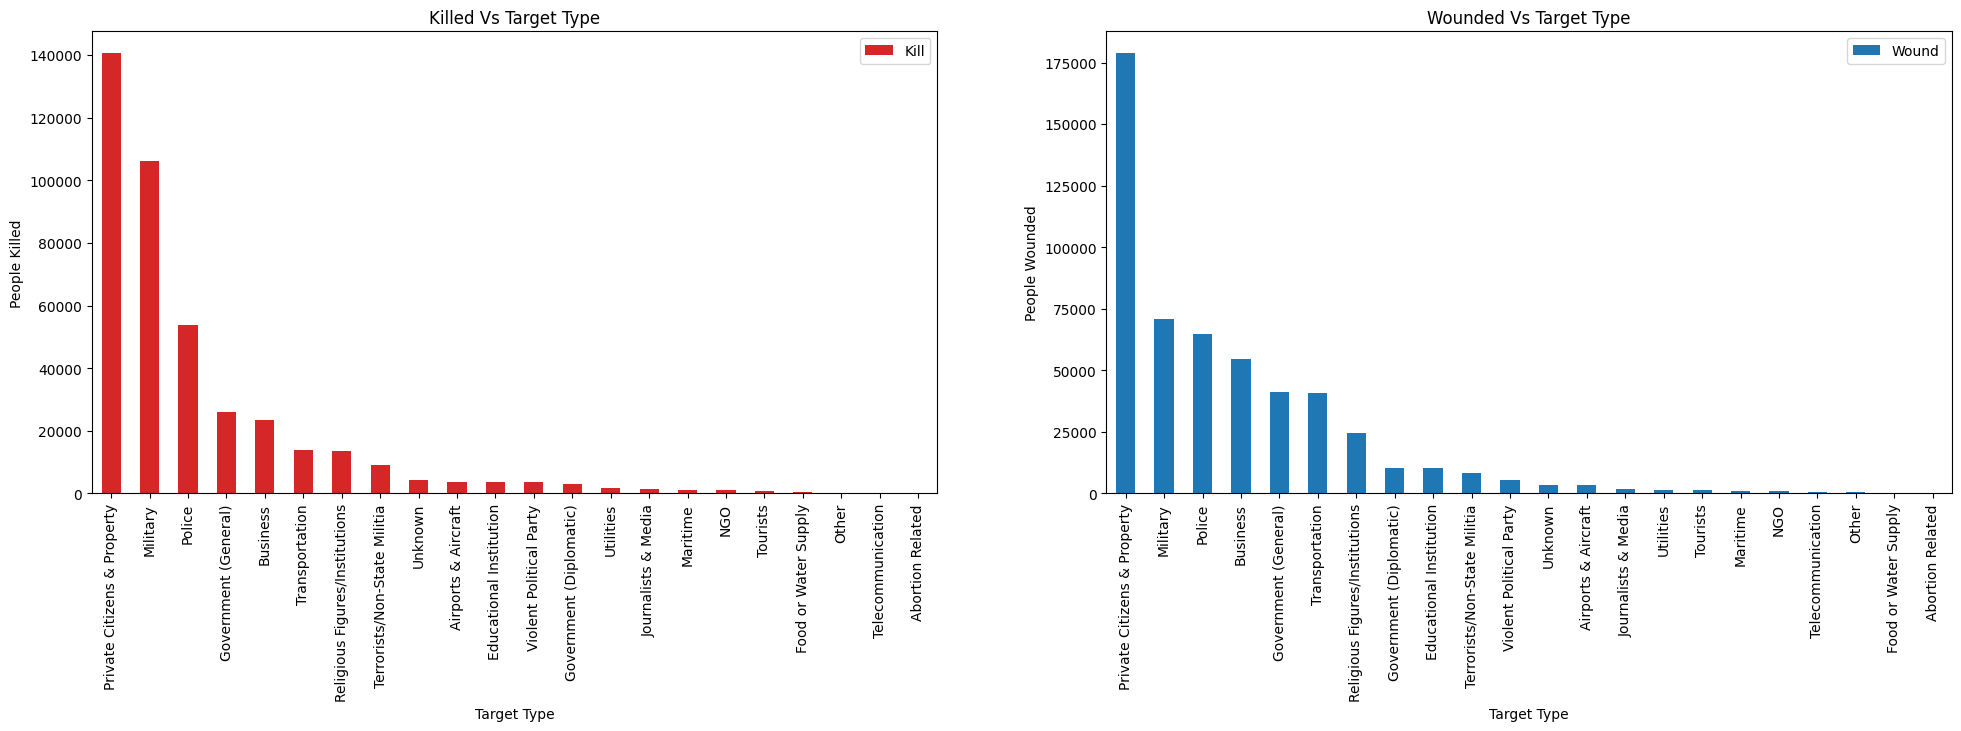

In [65]:
fig = plt.figure(figsize = (24,6))
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

# Killed
tk.plot(kind = "bar", color = "tab:red", ax = ax0)
ax0.set_ylabel("People Killed")
ax0.set_xlabel("Target Type")
ax0.set_title("Killed Vs Target Type")

# Wounded
tw.plot(kind = "bar", color = "tab:blue", ax = ax1)
ax1.set_ylabel("People Wounded")
ax1.set_xlabel("Target Type")
ax1.set_title("Wounded Vs Target Type")

plt.show()

### 8. Group + Country Wise Top 10
1. Sorting by number of attacks

In [66]:
gca = df[["Group", "Country"]].value_counts().drop("Unknown").head(10)
gca

C:\Users\Jeet Majumdar\AppData\Local\Temp\ipykernel_744\3808304743.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gca = df[["Group", "Country"]].value_counts().drop("Unknown").head(10)


Group                                             Country       
Taliban                                           Afghanistan       7423
Islamic State of Iraq and the Levant (ISIL)       Iraq              4797
Shining Path (SL)                                 Peru              4541
Farabundo Marti National Liberation Front (FMLN)  El Salvador       3330
Al-Shabaab                                        Somalia           2867
New People's Army (NPA)                           Philippines       2770
Irish Republican Army (IRA)                       United Kingdom    2575
Revolutionary Armed Forces of Colombia (FARC)     Colombia          2468
Kurdistan Workers' Party (PKK)                    Turkey            2109
Boko Haram                                        Nigeria           2087
dtype: int64

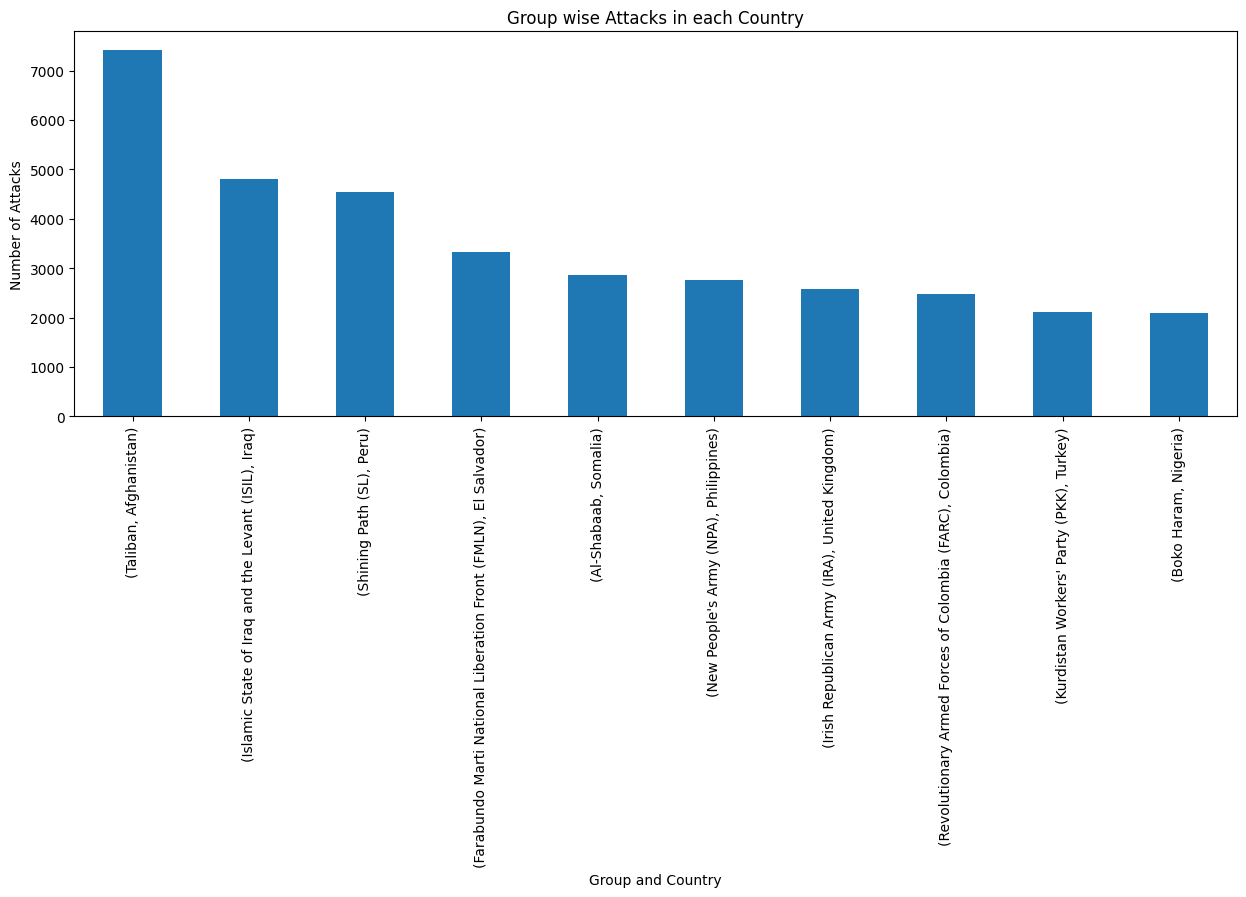

In [67]:
gca.plot(kind='bar', figsize=(15,5))
plt.title("Group wise Attacks in each Country")
plt.xlabel("Group and Country")
plt.ylabel("Number of Attacks")
plt.show()

2. Sorting by Number of Crsualties

In [68]:
gcc = df[["Group", "Country", "Casualties"]].groupby(["Group", "Country"]).sum().sort_values(by = "Casualties", ascending = False).drop("Unknown").head(10)
gcc

C:\Users\Jeet Majumdar\AppData\Local\Temp\ipykernel_744\2195807316.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gcc = df[["Group", "Country", "Casualties"]].groupby(["Group", "Country"]).sum().sort_values(by = "Casualties", ascending = False).drop("Unknown").head(10)


,,Casualties
Group,Country,
Taliban,Afghanistan,57140.0
Islamic State of Iraq and the Levant (ISIL),Iraq,54755.0
Boko Haram,Nigeria,24588.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,21919.0
Al-Qaida,United States,19494.0
Tehrik-i-Taliban Pakistan (TTP),Pakistan,15532.0
Shining Path (SL),Peru,14625.0
Al-Qaida in Iraq,Iraq,14348.0
Al-Shabaab,Somalia,14201.0


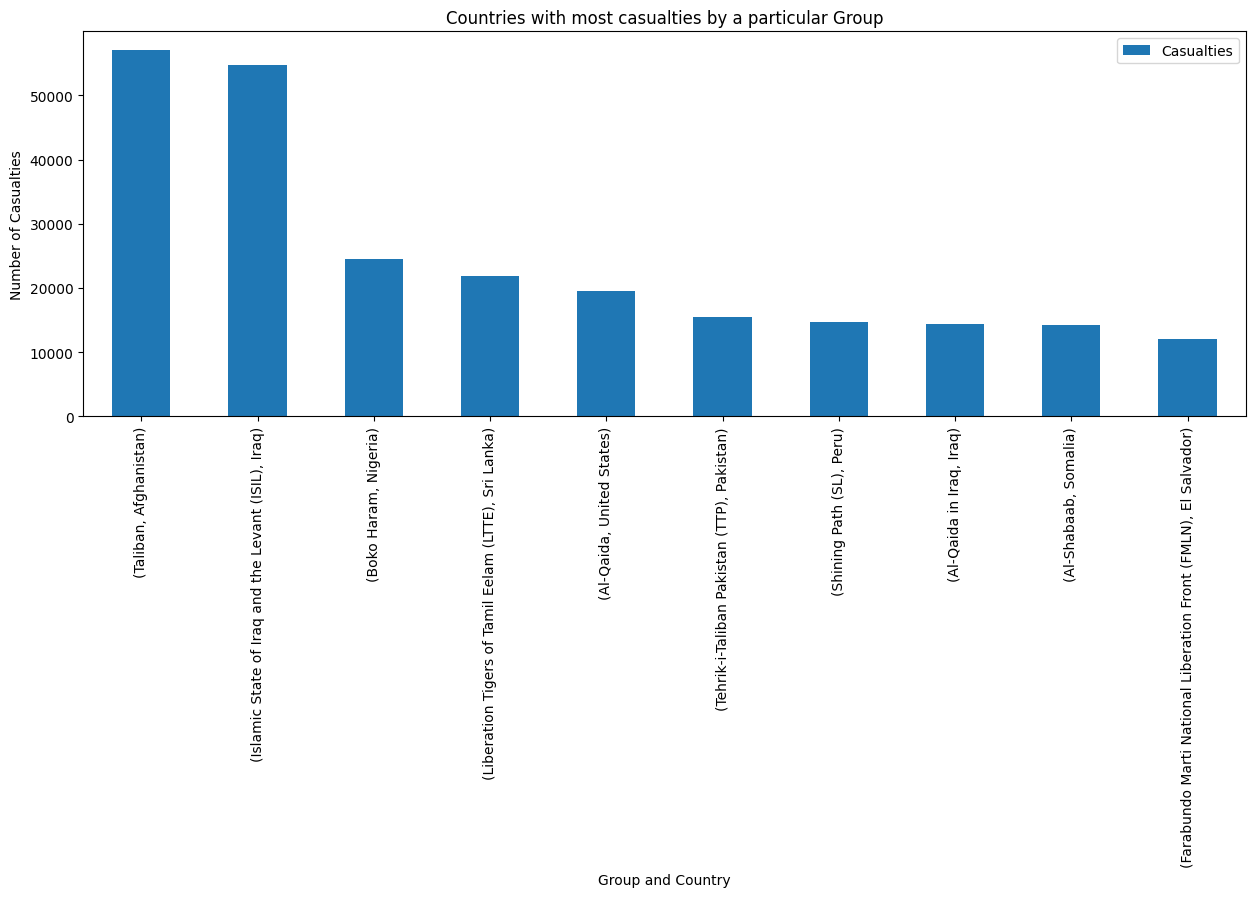

In [69]:
gcc.plot(kind='bar', figsize=(15,5))
plt.title("Countries with most casualties by a particular Group")
plt.xlabel("Group and Country")
plt.ylabel("Number of Casualties")
plt.show()

3. Sorting by number of People killed

In [70]:
gck = df[["Group", "Country", "Kill"]].groupby(["Group", "Country"]).sum().sort_values(by = "Kill", ascending = False).drop("Unknown").head(10)
gck

C:\Users\Jeet Majumdar\AppData\Local\Temp\ipykernel_744\2204625207.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gck = df[["Group", "Country", "Kill"]].groupby(["Group", "Country"]).sum().sort_values(by = "Kill", ascending = False).drop("Unknown").head(10)


,,Kill
Group,Country,
Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
Taliban,Afghanistan,29269.0
Boko Haram,Nigeria,16917.0
Shining Path (SL),Peru,11595.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
Al-Shabaab,Somalia,8176.0
Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
Nicaraguan Democratic Force (FDN),Nicaragua,6630.0


4. Sorting by number of People Wounded

In [71]:
gcw = df[["Group", "Country", "Wound"]].groupby(["Group", "Country"]).sum().sort_values(by = "Wound", ascending = False).drop("Unknown").head(10)
gcw

C:\Users\Jeet Majumdar\AppData\Local\Temp\ipykernel_744\1718547084.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gcw = df[["Group", "Country", "Wound"]].groupby(["Group", "Country"]).sum().sort_values(by = "Wound", ascending = False).drop("Unknown").head(10)


,,Wound
Group,Country,
Taliban,Afghanistan,27871.0
Islamic State of Iraq and the Levant (ISIL),Iraq,23697.0
Al-Qaida,United States,16493.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10991.0
Al-Qaida in Iraq,Iraq,10075.0
Tehrik-i-Taliban Pakistan (TTP),Pakistan,9518.0
Boko Haram,Nigeria,7671.0
Al-Shabaab,Somalia,6025.0
Aum Shinri Kyo,Japan,6003.0


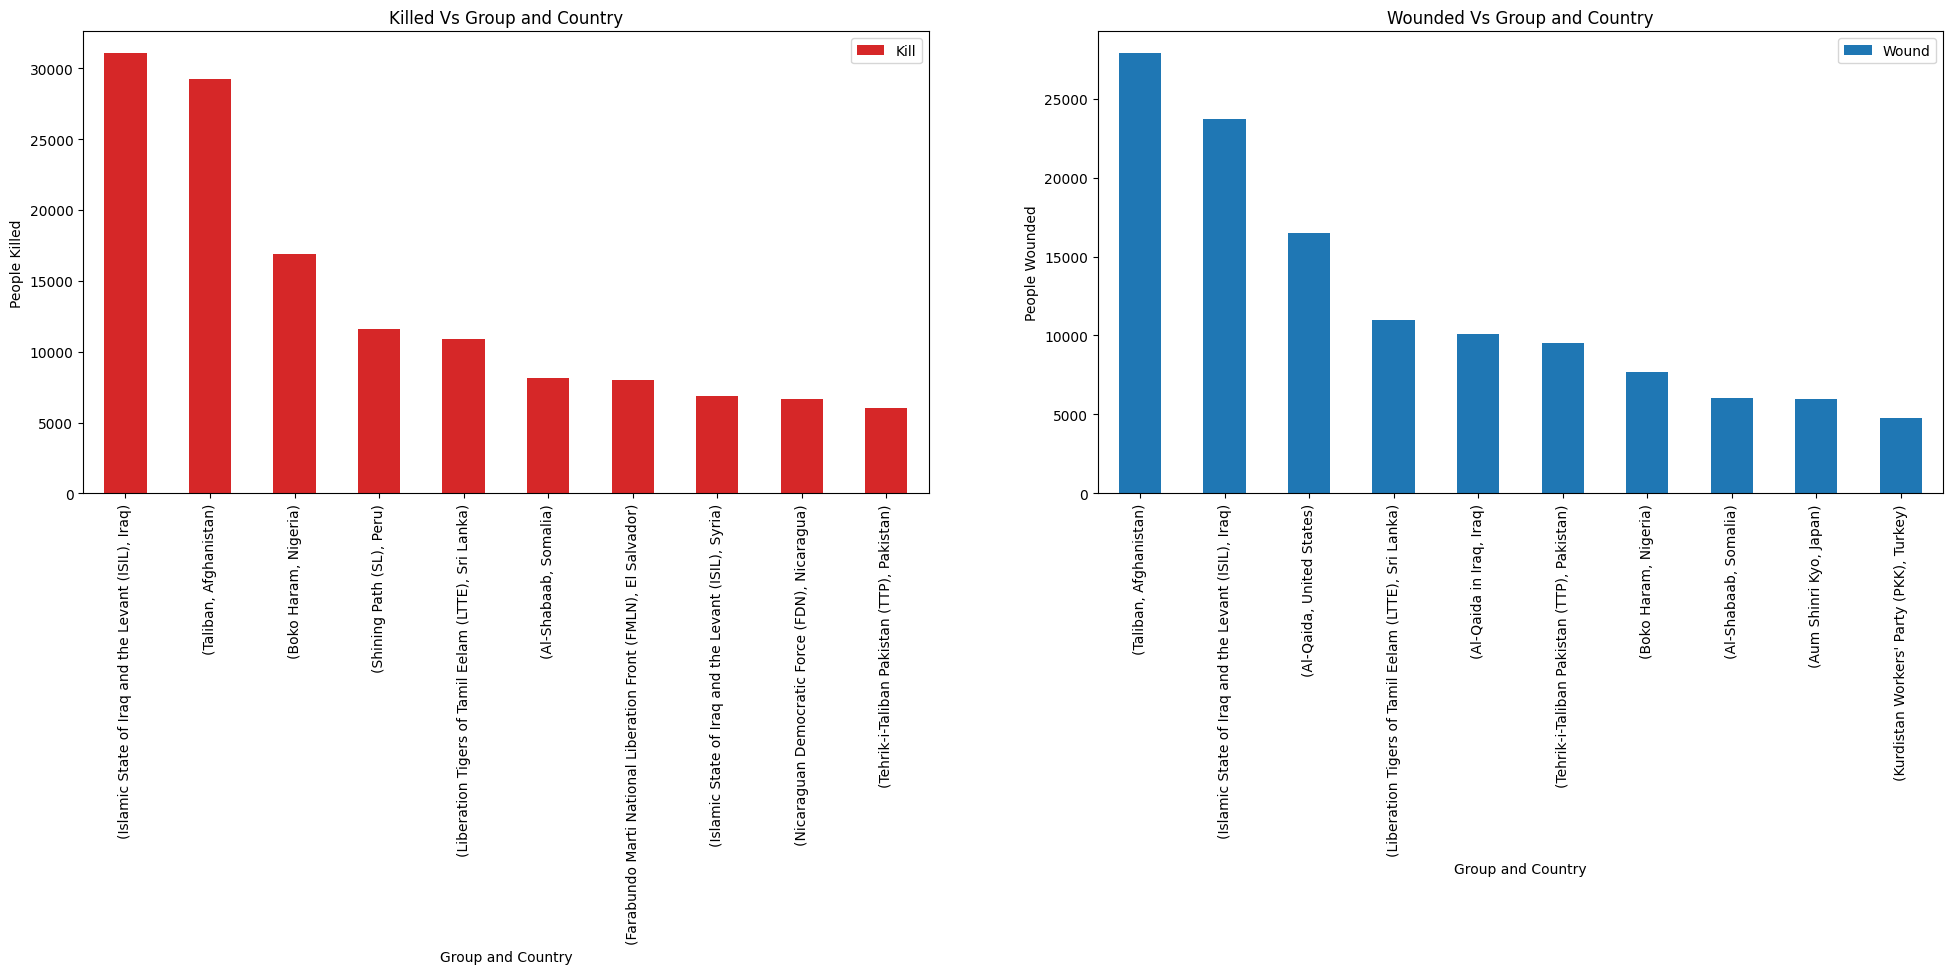

In [72]:
fig = plt.figure(figsize = (24,6))
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

# Killed
gck.plot(kind = "bar", color = "tab:red", ax = ax0)
ax0.set_ylabel("People Killed")
ax0.set_xlabel("Group and Country")
ax0.set_title("Killed Vs Group and Country")

# Wounded
gcw.plot(kind = "bar", color = "tab:blue", ax = ax1)
ax1.set_ylabel("People Wounded")
ax1.set_xlabel("Group and Country")
ax1.set_title("Wounded Vs Group and Country")

plt.show()


### 9. Humanity Affected (World-Wide) by Terrorist Attacks from 1970-2017
1. Total Casualties(Killed+Wounded) due to terrorist attacks

In [73]:
casualty = df.loc[:, 'Casualties'].sum()
print("Total Number of Casualties due to Terrorist Attacks from 1970-2017 across the world : \n", casualty)

Total Number of Casualties due to Terrorist Attacks from 1970-2017 across the world : 
 935737.0


2. Killed due to Terrorist Attacks

In [74]:
kill = df.loc[:, "Kill"].sum()
print("Total Number of People Killed due to Terrorist Attacks from 1970-2017 across the world : \n", kill)

Total Number of People Killed due to Terrorist Attacks from 1970-2017 across the world : 
 411868.0


3. Wounded due to Terrorist Attacks

In [75]:
wound = df.loc[:, "Wound"].sum()
print("Total Number of People Wounded due to Terrorist Attacks from 1970-2017 across the world : \n", wound)

Total Number of People Wounded due to Terrorist Attacks from 1970-2017 across the world : 
 523869.0


## Observation

1. Year wise Attacks :
    - Attacks
      - Most number of attacks: 16903 in 2014
      - Least number of attacks: 471 in 1971
    - Casualties
      - Most number of casualties: 85618 in 2014
      - Least number of casualties: 255 in 1971
    - Killed
      - Most number of people killed: 44490 in 2014
      - Least number of people killed: 173 in 1971
    - Wounde
      - Most number of people wounded: 44043 in 2015
      - Least number of people wounded: 82 in 1971
2. Region wise Attacks :
    - Attacks
      - Most number of attacks: 50474 in "Middle East & North Africa" 
      - Least number of attacks: 282 in "Australasia & Oceania"  
    - Casualties
      - Most number of casualties: 351950 in "Middle East & North Africa"
      - Least number of casualties: 410 in Australasia & Oceania
    - Killed
      - Most number of people killed: 137642 in "Middle East & North Africa"
      - Least number of people killed: 150 in "Australasia & Oceania"
    - Wounde
      - Most number of people wounded: 214308 in "Middle East & North Africa"
      - Least number of people wounded: 260 in "Australasia & Oceania"
3. Country wise Attacks [Top 10] :
    - Attacks
      - Most number of attacks: 24636 in "Iraq"
      - Least number of attacks: 4292 in "Turkey"
    - Casualties
      - Most number of casualties: 213279 in "Iraq"
      - Least number of casualties: 22926 in "Philippines"
    - Killed
      - Most number of people killed: 78589 in "Iraq"
      - Least number of people killed: 12053 in "El Salvador"
    - Wounde
      - Most number of people wounded: 134690 in "Iraq"
      - Least number of people wounded: 10328 in "Colombia"
4. City wise Attacks [Top 10] :
    - Attacks
      - Most number of attacks: 7589 in "Baghdad"
      - Least number of attacks: 1019 in "Athens"
    - Casualties
      - Most number of casualties: 77876 in "Baghdad"
      - Least number of casualties: 5748 in "Aleppo"
    - Killed
      - Most number of people killed: 21151 in "Baghdad"
      - Least number of people killed: 2125 in "Aleppo"
    - Wounde
      - Most number of people wounded: 56725 in "Baghdad"
      - Least number of people wounded: 4955 in "Mogadishu"
5. Terrorist Group wise Attacks [Top 10] :
    - Attacks
      - Most number of attacks : 7478 by "Taliban"
      - Least number of attacks : 2418 by "Boko Haram"
    - Casualties
      - Most number of casualties : 69595 by "Islamic State of Iraq and the Levant (ISIL)"
      - Least number of casualties : 12130 by "Farabundo Marti National Liberation Front (FMLN)"
    - Killed
      - Most number of people killed : 38923 by "Islamic State of Iraq and the Levant (ISIL)"
      - Least number of people killed : 5661 by "Revolutionary Armed Forces of Colombia (FARC)"
    - Wounde
      - Most number of people wounded : 30672 by "Islamic State of Iraq and the Levant (ISIL)"
      - Least number of people wounded : 4908 by "Kurdistan Workers' Party (PKK)"
6. Attack Type wise Attacks: 
    - Attacks
      - Most number of attacks : 88255 by "Bombing/Explosion"
      - Least number of attacks : 659 by "Hijacking"
    - Casualties
      - Most number of casualties : 530007 by "Bombing/Explosion"
      - Least number of casualties : 7407 by "Facility/Infrastructure Attack"
    - Killed
      - Most number of people killed : 160297 by "Armed Assault"
      - Least number of people killed : 880 by "Unarmed Assault"
    - Wounde
      - Most number of people wounded : 372686 by "Bombing/Explosion"
      - Least number of people wounded : 3765 by "Facility/Infrastructure Attack"
7. Target Type wise Attacks:
    - Attacks
      - Most number of attacks : 43511 over "Private Citizens & Property"
      - Least number of attacks : 263 over "Abortion Related"
    - Casualties
      - Most number of casualties : 319176 over "Private Citizens & Property"
      - Least number of casualties : 56 over "Abortion Related"
    - Killed
      - Most number of people killed : 140504 over "Private Citizens & Property"
      - Least number of people killed : 10 over "Abortion Related"
    - Wounde
      - Most number of people wounded : 178672 over "Private Citizens & Property"
      - Least number of people wounded : 46 over "Abortion Related
8. Group and Country wise Attacks [Top 10] :
    - Attacks
      - Most number of attacks : 7423 by "Taliban" in "Afghanistan"
      - Least number of attacks : 2087 by "Boko Haram" in "Nigeria"
    - Casualties
      - Most number of casualties : 57140 by "Taliban" in "Afghanistan"
      - Least number of casualties : 12068 by "Farabundo Marti National Liberation Front (FMLN)"	in "El Salvador"
    - Killed
      - Most number of people killed : 31058 by "Islamic State of Iraq and the Levant (ISIL)" in "Iraq"
      - Least number of people killed : 6014 by "Tehrik-i-Taliban Pakistan (TTP)" in "Pakistan"
    - Wounde
      - Most number of people wounded : 27871 by "Taliban" in "Afghanistan"
      - Least number of people wounded : 4795 by "Kurdistan Workers' Party (PKK)" in "Turkey"
9. Humanity Affected (World-wide) by Terrorist Attacks from 1970 to 2017 :
    - Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world : 935737
    - Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world : 411868
    - Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world : 523869